# Estudo da Base de Candidatos do TSE

## Importando Libs

In [1]:
import requests
import zipfile
import pandas as pd
import io
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.float_format', '{:,.2f}'.format)

pd.set_option('display.max_columns', None)


## Download e Importação dos Arquivos

### Arquivo de Candidatos

In [2]:

# URL do arquivo ZIP
url = 'https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2024.zip'

# Faz o download do arquivo
response = requests.get(url)
if response.status_code == 200:
    # Abre o arquivo ZIP em memória
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        # Lista os arquivos dentro do ZIP
        file_names = zip_ref.namelist()

        # Procura por um arquivo CSV
        for file_name in file_names:
            if file_name.endswith('BRASIL.csv'):
                # Lê o arquivo CSV diretamente do ZIP em um DataFrame
                with zip_ref.open(file_name) as file:
                    df_candidatos = pd.read_csv(file,sep=';', encoding='latin')
else:
    print(f"Falha ao baixar o arquivo: {response.status_code}")


In [3]:
df_candidatos.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO  CD_TIPO_ELEICAO    NM_TIPO_ELEICAO  \
0  21/11/2024   12:30:50         2024                2  ELEIÇÃO ORDINÁRIA   
1  21/11/2024   12:30:50         2024                2  ELEIÇÃO ORDINÁRIA   
2  21/11/2024   12:30:50         2024                2  ELEIÇÃO ORDINÁRIA   
3  21/11/2024   12:30:50         2024                2  ELEIÇÃO ORDINÁRIA   
4  21/11/2024   12:30:50         2024                2  ELEIÇÃO ORDINÁRIA   

   NR_TURNO  CD_ELEICAO                DS_ELEICAO  DT_ELEICAO TP_ABRANGENCIA  \
0         1         619  Eleições Municipais 2024  06/10/2024      MUNICIPAL   
1         1         619  Eleições Municipais 2024  06/10/2024      MUNICIPAL   
2         1         619  Eleições Municipais 2024  06/10/2024      MUNICIPAL   
3         1         619  Eleições Municipais 2024  06/10/2024      MUNICIPAL   
4         1         619  Eleições Municipais 2024  06/10/2024      MUNICIPAL   

  SG_UF  SG_UE                NM_UE  CD_CARGO       DS_CARGO  SQ_CANDIDATO  \
0    RJ  58467             MESQUITA        12  VICE-PREFEITO  190002260099   
1    MG  41335                BETIM        13       VEREADOR  130002398322   
2    PA   4774               JURUTI        13       VEREADOR  140002405317   
3    MG  51772  SANTANA DO MANHUAÇU        13       VEREADOR  130002371691   
4    PE  23175              AMARAJI        13       VEREADOR  170002214653   

   NR_CANDIDATO                           NM_CANDIDATO      NM_URNA_CANDIDATO  \
0            15  FERNANDO EDUARDO MIQUELOTTI GONÇALVES  DR FERNANDO GONÇALVES   
1         33223                 LUZIA NATALICIA FONTES                  ALICE   
2         13113                ALCILENE MOTA DO SANTOS          ALCILENE MOTA   
3         15015                  JOSÉ ROBERTO DE SOUZA     BETINHO DA JACINTO   
4         18111                 RUY FRANCISCO DA SILVA           RUY DA SAÚDE   

  NM_SOCIAL_CANDIDATO  NR_CPF_CANDIDATO        DS_EMAIL  \
0              #NULO#                -4  NÃO DIVULGÁVEL   
1              #NULO#                -4  NÃO DIVULGÁVEL   
2              #NULO#                -4  NÃO DIVULGÁVEL   
3              #NULO#                -4  NÃO DIVULGÁVEL   
4              #NULO#                -4  NÃO DIVULGÁVEL   

   CD_SITUACAO_CANDIDATURA DS_SITUACAO_CANDIDATURA    TP_AGREMIACAO  \
0                       -3                     #NE        COLIGAÇÃO   
1                       -3                     #NE  PARTIDO ISOLADO   
2                       -3                     #NE        FEDERAÇÃO   
3                       -3                     #NE  PARTIDO ISOLADO   
4                       -3                     #NE        FEDERAÇÃO   

   NR_PARTIDO SG_PARTIDO                        NM_PARTIDO  NR_FEDERACAO  \
0          15        MDB  MOVIMENTO DEMOCRÁTICO BRASILEIRO            -1   
1          33   MOBILIZA              MOBILIZAÇÃO NACIONAL            -1   
2          13         PT         PARTIDO DOS TRABALHADORES           101   
3          15        MDB  MOVIMENTO DEMOCRÁTICO BRASILEIRO            -1   
4          18       REDE             REDE SUSTENTABILIDADE           102   

                                NM_FEDERACAO   SG_FEDERACAO  \
0                                     #NULO#         #NULO#   
1                                     #NULO#         #NULO#   
2  Federação BRASIL DA ESPERANÇA - FE BRASIL  PT/PC do B/PV   
3                                     #NULO#         #NULO#   
4                        Federação PSOL REDE      PSOL/REDE   

  DS_COMPOSICAO_FEDERACAO  SQ_COLIGACAO                     NM_COLIGACAO  \
0                  #NULO#  190001746969  RECOMEÇAR, REALIZAR, REINVENTAR   
1                  #NULO#  130001710282                  PARTIDO ISOLADO   
2           PT/PC do B/PV  140001705449                        FEDERAÇÃO   
3                  #NULO#  130001762328                  PARTIDO ISOLADO   
4               PSOL/REDE  170001740702                        FEDERAÇÃO   

                            

In [4]:
df_candidatos.dtypes

DT_GERACAO                       object
HH_GERACAO                       object
ANO_ELEICAO                       int64
CD_TIPO_ELEICAO                   int64
NM_TIPO_ELEICAO                  object
NR_TURNO                          int64
CD_ELEICAO                        int64
DS_ELEICAO                       object
DT_ELEICAO                       object
TP_ABRANGENCIA                   object
SG_UF                            object
SG_UE                             int64
NM_UE                            object
CD_CARGO                          int64
DS_CARGO                         object
SQ_CANDIDATO                      int64
NR_CANDIDATO                      int64
NM_CANDIDATO                     object
NM_URNA_CANDIDATO                object
NM_SOCIAL_CANDIDATO              object
NR_CPF_CANDIDATO                  int64
DS_EMAIL                         object
CD_SITUACAO_CANDIDATURA           int64
DS_SITUACAO_CANDIDATURA          object
TP_AGREMIACAO                    object


In [5]:
# Excluir todas as colunas que começam com CD
df_candidatos.drop(columns=[col for col in df_candidatos.columns if col.startswith('CD')],axis=1,inplace=True)

df_candidatos.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO    NM_TIPO_ELEICAO  NR_TURNO  \
0  21/11/2024   12:30:50         2024  ELEIÇÃO ORDINÁRIA         1   
1  21/11/2024   12:30:50         2024  ELEIÇÃO ORDINÁRIA         1   
2  21/11/2024   12:30:50         2024  ELEIÇÃO ORDINÁRIA         1   
3  21/11/2024   12:30:50         2024  ELEIÇÃO ORDINÁRIA         1   
4  21/11/2024   12:30:50         2024  ELEIÇÃO ORDINÁRIA         1   

                 DS_ELEICAO  DT_ELEICAO TP_ABRANGENCIA SG_UF  SG_UE  \
0  Eleições Municipais 2024  06/10/2024      MUNICIPAL    RJ  58467   
1  Eleições Municipais 2024  06/10/2024      MUNICIPAL    MG  41335   
2  Eleições Municipais 2024  06/10/2024      MUNICIPAL    PA   4774   
3  Eleições Municipais 2024  06/10/2024      MUNICIPAL    MG  51772   
4  Eleições Municipais 2024  06/10/2024      MUNICIPAL    PE  23175   

                 NM_UE       DS_CARGO  SQ_CANDIDATO  NR_CANDIDATO  \
0             MESQUITA  VICE-PREFEITO  190002260099            15   
1                BETIM       VEREADOR  130002398322         33223   
2               JURUTI       VEREADOR  140002405317         13113   
3  SANTANA DO MANHUAÇU       VEREADOR  130002371691         15015   
4              AMARAJI       VEREADOR  170002214653         18111   

                            NM_CANDIDATO      NM_URNA_CANDIDATO  \
0  FERNANDO EDUARDO MIQUELOTTI GONÇALVES  DR FERNANDO GONÇALVES   
1                 LUZIA NATALICIA FONTES                  ALICE   
2                ALCILENE MOTA DO SANTOS          ALCILENE MOTA   
3                  JOSÉ ROBERTO DE SOUZA     BETINHO DA JACINTO   
4                 RUY FRANCISCO DA SILVA           RUY DA SAÚDE   

  NM_SOCIAL_CANDIDATO  NR_CPF_CANDIDATO        DS_EMAIL  \
0              #NULO#                -4  NÃO DIVULGÁVEL   
1              #NULO#                -4  NÃO DIVULGÁVEL   
2              #NULO#                -4  NÃO DIVULGÁVEL   
3              #NULO#                -4  NÃO DIVULGÁVEL   
4              #NULO#                -4  NÃO DIVULGÁVEL   

  DS_SITUACAO_CANDIDATURA    TP_AGREMIACAO  NR_PARTIDO SG_PARTIDO  \
0                     #NE        COLIGAÇÃO          15        MDB   
1                     #NE  PARTIDO ISOLADO          33   MOBILIZA   
2                     #NE        FEDERAÇÃO          13         PT   
3                     #NE  PARTIDO ISOLADO          15        MDB   
4                     #NE        FEDERAÇÃO          18       REDE   

                         NM_PARTIDO  NR_FEDERACAO  \
0  MOVIMENTO DEMOCRÁTICO BRASILEIRO            -1   
1              MOBILIZAÇÃO NACIONAL            -1   
2         PARTIDO DOS TRABALHADORES           101   
3  MOVIMENTO DEMOCRÁTICO BRASILEIRO            -1   
4             REDE SUSTENTABILIDADE           102   

                                NM_FEDERACAO   SG_FEDERACAO  \
0                                     #NULO#         #NULO#   
1                                     #NULO#         #NULO#   
2  Federação BRASIL DA ESPERANÇA - FE BRASIL  PT/PC do B/PV   
3                                     #NULO#         #NULO#   
4                        Federação PSOL REDE      PSOL/REDE   

  DS_COMPOSICAO_FEDERACAO  SQ_COLIGACAO                     NM_COLIGACAO  \
0                  #NULO#  190001746969  RECOMEÇAR, REALIZAR, REINVENTAR   
1                  #NULO#  130001710282                  PARTIDO ISOLADO   
2           PT/PC do B/PV  140001705449                        FEDERAÇÃO   
3                  #NULO#  130001762328                  PARTIDO ISOLADO   
4               PSOL/REDE  170001740702                        FEDERAÇÃO   

                             DS_COMPOSICAO_COLIGACAO SG_UF_NASCIMENTO  \
0                                           MDB / DC               RJ   
1                                           MOBILIZA               MG   
2  Federação BRASIL DA ESPERANÇA - FE BRASIL(PT/P...               PA   
3                                                MDB               MG   
4                     Federação PSOL REDE(PSOL/

In [6]:
#Convertendo as Datas para o formato correto
for col in df_candidatos.columns:
    if col.startswith('DT_'):
        df_candidatos[col] = pd.to_datetime(df_candidatos[col], format='%d/%m/%Y', errors='coerce')
        #Para datas inválidas, aplica-se Nat

df_candidatos.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO    NM_TIPO_ELEICAO  NR_TURNO  \
0 2024-11-21   12:30:50         2024  ELEIÇÃO ORDINÁRIA         1   
1 2024-11-21   12:30:50         2024  ELEIÇÃO ORDINÁRIA         1   
2 2024-11-21   12:30:50         2024  ELEIÇÃO ORDINÁRIA         1   
3 2024-11-21   12:30:50         2024  ELEIÇÃO ORDINÁRIA         1   
4 2024-11-21   12:30:50         2024  ELEIÇÃO ORDINÁRIA         1   

                 DS_ELEICAO DT_ELEICAO TP_ABRANGENCIA SG_UF  SG_UE  \
0  Eleições Municipais 2024 2024-10-06      MUNICIPAL    RJ  58467   
1  Eleições Municipais 2024 2024-10-06      MUNICIPAL    MG  41335   
2  Eleições Municipais 2024 2024-10-06      MUNICIPAL    PA   4774   
3  Eleições Municipais 2024 2024-10-06      MUNICIPAL    MG  51772   
4  Eleições Municipais 2024 2024-10-06      MUNICIPAL    PE  23175   

                 NM_UE       DS_CARGO  SQ_CANDIDATO  NR_CANDIDATO  \
0             MESQUITA  VICE-PREFEITO  190002260099            15   
1                BETIM       VEREADOR  130002398322         33223   
2               JURUTI       VEREADOR  140002405317         13113   
3  SANTANA DO MANHUAÇU       VEREADOR  130002371691         15015   
4              AMARAJI       VEREADOR  170002214653         18111   

                            NM_CANDIDATO      NM_URNA_CANDIDATO  \
0  FERNANDO EDUARDO MIQUELOTTI GONÇALVES  DR FERNANDO GONÇALVES   
1                 LUZIA NATALICIA FONTES                  ALICE   
2                ALCILENE MOTA DO SANTOS          ALCILENE MOTA   
3                  JOSÉ ROBERTO DE SOUZA     BETINHO DA JACINTO   
4                 RUY FRANCISCO DA SILVA           RUY DA SAÚDE   

  NM_SOCIAL_CANDIDATO  NR_CPF_CANDIDATO        DS_EMAIL  \
0              #NULO#                -4  NÃO DIVULGÁVEL   
1              #NULO#                -4  NÃO DIVULGÁVEL   
2              #NULO#                -4  NÃO DIVULGÁVEL   
3              #NULO#                -4  NÃO DIVULGÁVEL   
4              #NULO#                -4  NÃO DIVULGÁVEL   

  DS_SITUACAO_CANDIDATURA    TP_AGREMIACAO  NR_PARTIDO SG_PARTIDO  \
0                     #NE        COLIGAÇÃO          15        MDB   
1                     #NE  PARTIDO ISOLADO          33   MOBILIZA   
2                     #NE        FEDERAÇÃO          13         PT   
3                     #NE  PARTIDO ISOLADO          15        MDB   
4                     #NE        FEDERAÇÃO          18       REDE   

                         NM_PARTIDO  NR_FEDERACAO  \
0  MOVIMENTO DEMOCRÁTICO BRASILEIRO            -1   
1              MOBILIZAÇÃO NACIONAL            -1   
2         PARTIDO DOS TRABALHADORES           101   
3  MOVIMENTO DEMOCRÁTICO BRASILEIRO            -1   
4             REDE SUSTENTABILIDADE           102   

                                NM_FEDERACAO   SG_FEDERACAO  \
0                                     #NULO#         #NULO#   
1                                     #NULO#         #NULO#   
2  Federação BRASIL DA ESPERANÇA - FE BRASIL  PT/PC do B/PV   
3                                     #NULO#         #NULO#   
4                        Federação PSOL REDE      PSOL/REDE   

  DS_COMPOSICAO_FEDERACAO  SQ_COLIGACAO                     NM_COLIGACAO  \
0                  #NULO#  190001746969  RECOMEÇAR, REALIZAR, REINVENTAR   
1                  #NULO#  130001710282                  PARTIDO ISOLADO   
2           PT/PC do B/PV  140001705449                        FEDERAÇÃO   
3                  #NULO#  130001762328                  PARTIDO ISOLADO   
4               PSOL/REDE  170001740702                        FEDERAÇÃO   

                             DS_COMPOSICAO_COLIGACAO SG_UF_NASCIMENTO  \
0                                           MDB / DC               RJ   
1                                           MOBILIZA               MG   
2  Federação BRASIL DA ESPERANÇA - FE BRASIL(PT/P...               PA   
3                                                MDB               MG   
4                     Federação PSOL REDE(PSOL/REDE)      

In [7]:
df_candidatos.dtypes

DT_GERACAO                       datetime64[ns]
HH_GERACAO                               object
ANO_ELEICAO                               int64
NM_TIPO_ELEICAO                          object
NR_TURNO                                  int64
DS_ELEICAO                               object
DT_ELEICAO                       datetime64[ns]
TP_ABRANGENCIA                           object
SG_UF                                    object
SG_UE                                     int64
NM_UE                                    object
DS_CARGO                                 object
SQ_CANDIDATO                              int64
NR_CANDIDATO                              int64
NM_CANDIDATO                             object
NM_URNA_CANDIDATO                        object
NM_SOCIAL_CANDIDATO                      object
NR_CPF_CANDIDATO                          int64
DS_EMAIL                                 object
DS_SITUACAO_CANDIDATURA                  object
TP_AGREMIACAO                           

In [8]:
df_candidatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463598 entries, 0 to 463597
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DT_GERACAO                     463598 non-null  datetime64[ns]
 1   HH_GERACAO                     463598 non-null  object        
 2   ANO_ELEICAO                    463598 non-null  int64         
 3   NM_TIPO_ELEICAO                463598 non-null  object        
 4   NR_TURNO                       463598 non-null  int64         
 5   DS_ELEICAO                     463598 non-null  object        
 6   DT_ELEICAO                     463598 non-null  datetime64[ns]
 7   TP_ABRANGENCIA                 463598 non-null  object        
 8   SG_UF                          463598 non-null  object        
 9   SG_UE                          463598 non-null  int64         
 10  NM_UE                          463598 non-null  object        
 11  

### Arquivo Complementar de Candidatos

In [9]:

# URL do arquivo ZIP
url = 'https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand_complementar/consulta_cand_complementar_2024.zip'

# Faz o download do arquivo
response = requests.get(url)
if response.status_code == 200:
    # Abre o arquivo ZIP em memória
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        # Lista os arquivos dentro do ZIP
        file_names = zip_ref.namelist()

        # Procura por um arquivo CSV
        for file_name in file_names:
            if file_name.endswith('BRASIL.csv'):
                # Lê o arquivo CSV diretamente do ZIP em um DataFrame
                with zip_ref.open(file_name) as file:
                    df_cand_compl = pd.read_csv(file,sep=';', encoding='latin')
else:
    print(f"Falha ao baixar o arquivo: {response.status_code}")


In [10]:
df_cand_compl.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO  CD_ELEICAO  SQ_CANDIDATO  \
0  21/11/2024   12:30:50         2024         619  240002389134   
1  21/11/2024   12:30:50         2024         619  250001908920   
2  21/11/2024   12:30:50         2024         619  250002193673   
3  21/11/2024   12:30:50         2024         619   10002024496   
4  21/11/2024   12:30:50         2024         619   20002010454   

   CD_DETALHE_SITUACAO_CAND DS_DETALHE_SITUACAO_CAND  CD_NACIONALIDADE  \
0                        -3                      #NE                 1   
1                        -3                      #NE                 1   
2                        -3                      #NE                 1   
3                        -3                      #NE                 1   
4                        -3                      #NE                 1   

  DS_NACIONALIDADE  CD_MUNICIPIO_NASCIMENTO NM_MUNICIPIO_NASCIMENTO  \
0  BRASILEIRA NATA                       -3                 PALHOÇA   
1  BRASILEIRA NATA                       -3                 ITAPEVI   
2  BRASILEIRA NATA                       -3                  SANTOS   
3  BRASILEIRA NATA                       -3                   FEIJÓ   
4  BRASILEIRA NATA                       -3           PÃO DE AÇÚCAR   

   NR_IDADE_DATA_POSSE ST_QUILOMBOLA  CD_ETNIA_INDIGENA DS_ETNIA_INDIGENA  \
0                35.00             N                  0     NÃO INFORMADO   
1                52.00             N                  0     NÃO INFORMADO   
2                47.00             N                 -1            #NULO#   
3                43.00             N                  0     NÃO INFORMADO   
4                32.00             N                 -1            #NULO#   

   VR_DESPESA_MAX_CAMPANHA ST_REELEICAO ST_DECLARAR_BENS  \
0                    -1.00            N                N   
1               139,551.52            N                S   
2               360,961.85            N                S   
3                24,130.17            N                N   
4                15,985.08            S                S   

   NR_PROTOCOLO_CANDIDATURA          NR_PROCESSO  \
0                        -1  6002448720246240024   
1                        -1  6002129020246260359   
2                        -1  6002714220246260177   
3                        -1  6000637920246010007   
4                        -1  6000954520246020011   

   CD_SITUACAO_CANDIDATO_PLEITO DS_SITUACAO_CANDIDATO_PLEITO  \
0                            -3                          #NE   
1                            -3                          #NE   
2                            -3                          #NE   
3                            -3                          #NE   
4                            -3                          #NE   

   CD_SITUACAO_CANDIDATO_URNA DS_SITUACAO_CANDIDATO_URNA  \
0                          -3                        #NE   
1                          -3                        #NE   
2                          -3                        #NE   
3                          -3                        #NE   
4                          -3                        #NE   

  ST_CANDIDATO_INSERIDO_URNA NM_TIPO_DESTINACAO_VOTOS  \
0                        SIM                   #NULO#   
1                        SIM                   Válido   
2                        SIM                   Válido   
3                        SIM                   Válido   
4                        SIM                   Válido   

   CD_SITUACAO_CANDIDATO_TOT DS_SITUACAO_CANDIDATO_TOT ST_PREST_CONTAS  \
0                          2                  DEFERIDO               N   
1                          2                  DEFERIDO               S   
2                          2                  DEFERIDO               S   
3                          2                  DEFERIDO               S   
4                          2                  DEFERIDO               S   

  ST_SUBSTITUIDO  SQ_SUBSTITUIDO  SQ_ORDEM_SUPLENCIA DT_A

In [11]:
df_cand_compl.dtypes

DT_GERACAO                        object
HH_GERACAO                        object
ANO_ELEICAO                        int64
CD_ELEICAO                         int64
SQ_CANDIDATO                       int64
CD_DETALHE_SITUACAO_CAND           int64
DS_DETALHE_SITUACAO_CAND          object
CD_NACIONALIDADE                   int64
DS_NACIONALIDADE                  object
CD_MUNICIPIO_NASCIMENTO            int64
NM_MUNICIPIO_NASCIMENTO           object
NR_IDADE_DATA_POSSE              float64
ST_QUILOMBOLA                     object
CD_ETNIA_INDIGENA                  int64
DS_ETNIA_INDIGENA                 object
VR_DESPESA_MAX_CAMPANHA          float64
ST_REELEICAO                      object
ST_DECLARAR_BENS                  object
NR_PROTOCOLO_CANDIDATURA           int64
NR_PROCESSO                        int64
CD_SITUACAO_CANDIDATO_PLEITO       int64
DS_SITUACAO_CANDIDATO_PLEITO      object
CD_SITUACAO_CANDIDATO_URNA         int64
DS_SITUACAO_CANDIDATO_URNA        object
ST_CANDIDATO_INS

In [12]:
# Excluir todas as colunas que começam com CD
df_cand_compl.drop(columns=[col for col in df_cand_compl.columns if col.startswith('CD')],axis=1,inplace=True)

df_cand_compl.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO  SQ_CANDIDATO DS_DETALHE_SITUACAO_CAND  \
0  21/11/2024   12:30:50         2024  240002389134                      #NE   
1  21/11/2024   12:30:50         2024  250001908920                      #NE   
2  21/11/2024   12:30:50         2024  250002193673                      #NE   
3  21/11/2024   12:30:50         2024   10002024496                      #NE   
4  21/11/2024   12:30:50         2024   20002010454                      #NE   

  DS_NACIONALIDADE NM_MUNICIPIO_NASCIMENTO  NR_IDADE_DATA_POSSE ST_QUILOMBOLA  \
0  BRASILEIRA NATA                 PALHOÇA                35.00             N   
1  BRASILEIRA NATA                 ITAPEVI                52.00             N   
2  BRASILEIRA NATA                  SANTOS                47.00             N   
3  BRASILEIRA NATA                   FEIJÓ                43.00             N   
4  BRASILEIRA NATA           PÃO DE AÇÚCAR                32.00             N   

  DS_ETNIA_INDIGENA  VR_DESPESA_MAX_CAMPANHA ST_REELEICAO ST_DECLARAR_BENS  \
0     NÃO INFORMADO                    -1.00            N                N   
1     NÃO INFORMADO               139,551.52            N                S   
2            #NULO#               360,961.85            N                S   
3     NÃO INFORMADO                24,130.17            N                N   
4            #NULO#                15,985.08            S                S   

   NR_PROTOCOLO_CANDIDATURA          NR_PROCESSO DS_SITUACAO_CANDIDATO_PLEITO  \
0                        -1  6002448720246240024                          #NE   
1                        -1  6002129020246260359                          #NE   
2                        -1  6002714220246260177                          #NE   
3                        -1  6000637920246010007                          #NE   
4                        -1  6000954520246020011                          #NE   

  DS_SITUACAO_CANDIDATO_URNA ST_CANDIDATO_INSERIDO_URNA  \
0                        #NE                        SIM   
1                        #NE                        SIM   
2                        #NE                        SIM   
3                        #NE                        SIM   
4                        #NE                        SIM   

  NM_TIPO_DESTINACAO_VOTOS DS_SITUACAO_CANDIDATO_TOT ST_PREST_CONTAS  \
0                   #NULO#                  DEFERIDO               N   
1                   Válido                  DEFERIDO               S   
2                   Válido                  DEFERIDO               S   
3                   Válido                  DEFERIDO               S   
4                   Válido                  DEFERIDO               S   

  ST_SUBSTITUIDO  SQ_SUBSTITUIDO  SQ_ORDEM_SUPLENCIA DT_ACEITE_CANDIDATURA  \
0              N              -1                   1   2024-09-04 12:01:15   
1              N              -1                   7   2024-07-31 10:47:14   
2              N              -1                  -1   2024-08-13 11:23:52   
3              N              -1                   4   2024-08-08 13:20:14   
4              N              -1                  -1   2024-08-08 10:35:28   

  DS_SITUACAO_JULGAMENTO DS_SITUACAO_JULGAMENTO_PLEITO  \
0               DEFERIDO                      DEFERIDO   
1               DEFERIDO                      DEFERIDO   
2               DEFERIDO                      DEFERIDO   
3               DEFERIDO                      DEFERIDO   
4               DEFERIDO                      DEFERIDO   

  DS_SITUACAO_JULGAMENTO_URNA DS_SITUACAO_CASSACAO DS_SITUACAO_CASSACAO_MIDIA  \
0                    DEFERIDO               #NULO#                     #NULO#   
1                    DEFERIDO               #NULO#                     #NULO#   
2                    DEFERIDO               #NULO#                     #NULO#   
3                    DEFERIDO               #NULO#                     #NULO#   
4                    DEFERIDO               #NULO#                  

In [13]:
#Convertendo as Datas para o formato correto
for col in df_cand_compl.columns:
    if col.startswith('DT_'):
        df_cand_compl[col] = pd.to_datetime(df_cand_compl[col], format='%d/%m/%Y', errors='coerce')
        #Para datas inválidas, aplica-se Nat

df_cand_compl.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO  SQ_CANDIDATO DS_DETALHE_SITUACAO_CAND  \
0 2024-11-21   12:30:50         2024  240002389134                      #NE   
1 2024-11-21   12:30:50         2024  250001908920                      #NE   
2 2024-11-21   12:30:50         2024  250002193673                      #NE   
3 2024-11-21   12:30:50         2024   10002024496                      #NE   
4 2024-11-21   12:30:50         2024   20002010454                      #NE   

  DS_NACIONALIDADE NM_MUNICIPIO_NASCIMENTO  NR_IDADE_DATA_POSSE ST_QUILOMBOLA  \
0  BRASILEIRA NATA                 PALHOÇA                35.00             N   
1  BRASILEIRA NATA                 ITAPEVI                52.00             N   
2  BRASILEIRA NATA                  SANTOS                47.00             N   
3  BRASILEIRA NATA                   FEIJÓ                43.00             N   
4  BRASILEIRA NATA           PÃO DE AÇÚCAR                32.00             N   

  DS_ETNIA_INDIGENA  VR_DESPESA_MAX_CAMPANHA ST_REELEICAO ST_DECLARAR_BENS  \
0     NÃO INFORMADO                    -1.00            N                N   
1     NÃO INFORMADO               139,551.52            N                S   
2            #NULO#               360,961.85            N                S   
3     NÃO INFORMADO                24,130.17            N                N   
4            #NULO#                15,985.08            S                S   

   NR_PROTOCOLO_CANDIDATURA          NR_PROCESSO DS_SITUACAO_CANDIDATO_PLEITO  \
0                        -1  6002448720246240024                          #NE   
1                        -1  6002129020246260359                          #NE   
2                        -1  6002714220246260177                          #NE   
3                        -1  6000637920246010007                          #NE   
4                        -1  6000954520246020011                          #NE   

  DS_SITUACAO_CANDIDATO_URNA ST_CANDIDATO_INSERIDO_URNA  \
0                        #NE                        SIM   
1                        #NE                        SIM   
2                        #NE                        SIM   
3                        #NE                        SIM   
4                        #NE                        SIM   

  NM_TIPO_DESTINACAO_VOTOS DS_SITUACAO_CANDIDATO_TOT ST_PREST_CONTAS  \
0                   #NULO#                  DEFERIDO               N   
1                   Válido                  DEFERIDO               S   
2                   Válido                  DEFERIDO               S   
3                   Válido                  DEFERIDO               S   
4                   Válido                  DEFERIDO               S   

  ST_SUBSTITUIDO  SQ_SUBSTITUIDO  SQ_ORDEM_SUPLENCIA DT_ACEITE_CANDIDATURA  \
0              N              -1                   1                   NaT   
1              N              -1                   7                   NaT   
2              N              -1                  -1                   NaT   
3              N              -1                   4                   NaT   
4              N              -1                  -1                   NaT   

  DS_SITUACAO_JULGAMENTO DS_SITUACAO_JULGAMENTO_PLEITO  \
0               DEFERIDO                      DEFERIDO   
1               DEFERIDO                      DEFERIDO   
2               DEFERIDO                      DEFERIDO   
3               DEFERIDO                      DEFERIDO   
4               DEFERIDO                      DEFERIDO   

  DS_SITUACAO_JULGAMENTO_URNA DS_SITUACAO_CASSACAO DS_SITUACAO_CASSACAO_MIDIA  \
0                    DEFERIDO               #NULO#                     #NULO#   
1                    DEFERIDO               #NULO#                     #NULO#   
2                    DEFERIDO               #NULO#                     #NULO#   
3                    DEFERIDO               #NULO#                     #NULO#   
4                    DEFERIDO               #NULO#                     #N

In [14]:
df_cand_compl.dtypes

DT_GERACAO                       datetime64[ns]
HH_GERACAO                               object
ANO_ELEICAO                               int64
SQ_CANDIDATO                              int64
DS_DETALHE_SITUACAO_CAND                 object
DS_NACIONALIDADE                         object
NM_MUNICIPIO_NASCIMENTO                  object
NR_IDADE_DATA_POSSE                     float64
ST_QUILOMBOLA                            object
DS_ETNIA_INDIGENA                        object
VR_DESPESA_MAX_CAMPANHA                 float64
ST_REELEICAO                             object
ST_DECLARAR_BENS                         object
NR_PROTOCOLO_CANDIDATURA                  int64
NR_PROCESSO                               int64
DS_SITUACAO_CANDIDATO_PLEITO             object
DS_SITUACAO_CANDIDATO_URNA               object
ST_CANDIDATO_INSERIDO_URNA               object
NM_TIPO_DESTINACAO_VOTOS                 object
DS_SITUACAO_CANDIDATO_TOT                object
ST_PREST_CONTAS                         

In [15]:
# Tratando os campos de valores
#for col in df_cand_compl.columns:
#    if col.startswith('VR'):
#        df_cand_compl[col] = df_cand_compl[col].str.replace('.', '', regex=False)
#        df_cand_compl[col] = df_cand_compl[col].str.replace(',', '.', regex=False)
#        df_cand_compl[col] = pd.to_numeric(df_cand_compl[col], errors='coerce')

#print(df_cand_compl.head())



In [16]:
df_cand_compl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463598 entries, 0 to 463597
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DT_GERACAO                     463598 non-null  datetime64[ns]
 1   HH_GERACAO                     463598 non-null  object        
 2   ANO_ELEICAO                    463598 non-null  int64         
 3   SQ_CANDIDATO                   463598 non-null  int64         
 4   DS_DETALHE_SITUACAO_CAND       463598 non-null  object        
 5   DS_NACIONALIDADE               463598 non-null  object        
 6   NM_MUNICIPIO_NASCIMENTO        463598 non-null  object        
 7   NR_IDADE_DATA_POSSE            463553 non-null  float64       
 8   ST_QUILOMBOLA                  463598 non-null  object        
 9   DS_ETNIA_INDIGENA              463598 non-null  object        
 10  VR_DESPESA_MAX_CAMPANHA        463598 non-null  float64       
 11  

### Arquivo informando os Bens dos Candidatos

In [17]:

# URL do arquivo ZIP
url = 'https://cdn.tse.jus.br/estatistica/sead/odsele/bem_candidato/bem_candidato_2024.zip'

# Faz o download do arquivo
response = requests.get(url)
if response.status_code == 200:
    # Abre o arquivo ZIP em memória
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        # Lista os arquivos dentro do ZIP
        file_names = zip_ref.namelist()

        # Procura por um arquivo CSV
        for file_name in file_names:
            if file_name.endswith('BRASIL.csv'):
                # Lê o arquivo CSV diretamente do ZIP em um DataFrame
                with zip_ref.open(file_name) as file:
                    df_bens_cand = pd.read_csv(file,sep=';', encoding='latin')
else:
    print(f"Falha ao baixar o arquivo: {response.status_code}")


In [18]:
df_bens_cand.dtypes

DT_GERACAO                    object
HH_GERACAO                    object
ANO_ELEICAO                    int64
CD_TIPO_ELEICAO                int64
NM_TIPO_ELEICAO               object
CD_ELEICAO                     int64
DS_ELEICAO                    object
DT_ELEICAO                    object
SG_UF                         object
SG_UE                          int64
NM_UE                         object
SQ_CANDIDATO                   int64
NR_ORDEM_BEM_CANDIDATO         int64
CD_TIPO_BEM_CANDIDATO          int64
DS_TIPO_BEM_CANDIDATO         object
DS_BEM_CANDIDATO              object
VR_BEM_CANDIDATO              object
DT_ULT_ATUAL_BEM_CANDIDATO    object
HH_ULT_ATUAL_BEM_CANDIDATO    object
dtype: object

In [19]:
# Excluir todas as colunas que começam com CD
df_bens_cand.drop(columns=[col for col in df_bens_cand.columns if col.startswith('CD')],axis=1,inplace=True)

df_bens_cand.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO    NM_TIPO_ELEICAO  \
0  21/11/2024   19:30:20         2024  Eleição Ordinária   
1  21/11/2024   19:30:20         2024  Eleição Ordinária   
2  21/11/2024   19:30:20         2024  Eleição Ordinária   
3  21/11/2024   19:30:20         2024  Eleição Ordinária   
4  21/11/2024   19:30:20         2024  Eleição Ordinária   

                 DS_ELEICAO  DT_ELEICAO SG_UF  SG_UE   NM_UE  SQ_CANDIDATO  \
0  Eleições Municipais 2024  06/10/2024    PR  84530   TURVO  160002372148   
1  Eleições Municipais 2024  06/10/2024    PR  84530   TURVO  160002372151   
2  Eleições Municipais 2024  06/10/2024    PR  84530   TURVO  160002372154   
3  Eleições Municipais 2024  06/10/2024    PR  84530   TURVO  160002372157   
4  Eleições Municipais 2024  06/10/2024    PR  79278  TOLEDO  160002373467   

   NR_ORDEM_BEM_CANDIDATO          DS_TIPO_BEM_CANDIDATO  \
0                       1  Quotas ou quinhões de capital   
1                       1  Quotas ou quinhões de capital   
2                       1  Quotas ou quinhões de capital   
3                       1  Quotas ou quinhões de capital   
4                       5  Quotas ou quinhões de capital   

                                    DS_BEM_CANDIDATO VR_BEM_CANDIDATO  \
0        CAPITAL SOCIAL EMPRESA VERHAGEN   CIA. LTDA         50000,00   
1  CAPITAL SOCIAL EMPRESA PEREIRA PRESTADORA DE S...        200000,00   
2                      COTA EMPRESA ODAIR J FERREIRA         10000,00   
3  CAPITAL SOCIAL BAR E MERCEARIA MELNIK, COM DE ...          5000,00   
4  50% QUOTAS DE CAPITAL NA EMPRESA SIEGA S BOUTIQUE         10000,00   

  DT_ULT_ATUAL_BEM_CANDIDATO HH_ULT_ATUAL_BEM_CANDIDATO  
0                 18/09/2024                   15:09:27  
1                 06/10/2024                   21:43:47  
2                 18/09/2024                   15:09:27  
3                 06/10/2024                   21:43:47  
4                 06/10/2024                   21:54:46

In [20]:
#Convertendo as Datas para o formato correto
for col in df_bens_cand.columns:
    if col.startswith('DT_'):
        df_bens_cand[col] = pd.to_datetime(df_bens_cand[col], format='%d/%m/%Y', errors='coerce')
        #Para datas inválidas, aplica-se Nat

df_bens_cand.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO    NM_TIPO_ELEICAO  \
0 2024-11-21   19:30:20         2024  Eleição Ordinária   
1 2024-11-21   19:30:20         2024  Eleição Ordinária   
2 2024-11-21   19:30:20         2024  Eleição Ordinária   
3 2024-11-21   19:30:20         2024  Eleição Ordinária   
4 2024-11-21   19:30:20         2024  Eleição Ordinária   

                 DS_ELEICAO DT_ELEICAO SG_UF  SG_UE   NM_UE  SQ_CANDIDATO  \
0  Eleições Municipais 2024 2024-10-06    PR  84530   TURVO  160002372148   
1  Eleições Municipais 2024 2024-10-06    PR  84530   TURVO  160002372151   
2  Eleições Municipais 2024 2024-10-06    PR  84530   TURVO  160002372154   
3  Eleições Municipais 2024 2024-10-06    PR  84530   TURVO  160002372157   
4  Eleições Municipais 2024 2024-10-06    PR  79278  TOLEDO  160002373467   

   NR_ORDEM_BEM_CANDIDATO          DS_TIPO_BEM_CANDIDATO  \
0                       1  Quotas ou quinhões de capital   
1                       1  Quotas ou quinhões de capital   
2                       1  Quotas ou quinhões de capital   
3                       1  Quotas ou quinhões de capital   
4                       5  Quotas ou quinhões de capital   

                                    DS_BEM_CANDIDATO VR_BEM_CANDIDATO  \
0        CAPITAL SOCIAL EMPRESA VERHAGEN   CIA. LTDA         50000,00   
1  CAPITAL SOCIAL EMPRESA PEREIRA PRESTADORA DE S...        200000,00   
2                      COTA EMPRESA ODAIR J FERREIRA         10000,00   
3  CAPITAL SOCIAL BAR E MERCEARIA MELNIK, COM DE ...          5000,00   
4  50% QUOTAS DE CAPITAL NA EMPRESA SIEGA S BOUTIQUE         10000,00   

  DT_ULT_ATUAL_BEM_CANDIDATO HH_ULT_ATUAL_BEM_CANDIDATO  
0                 2024-09-18                   15:09:27  
1                 2024-10-06                   21:43:47  
2                 2024-09-18                   15:09:27  
3                 2024-10-06                   21:43:47  
4                 2024-10-06                   21:54:46

In [21]:
# Tratando os campos de valores
# Excluir todas as colunas que começam com CD
df_bens_cand.drop(columns=[col for col in df_bens_cand.columns if col.startswith('CD')],axis=1,inplace=True)

for col in df_bens_cand.columns:
    if col.startswith('VR_'):
        df_bens_cand[col] = df_bens_cand[col].str.replace('.', '', regex=False)
        df_bens_cand[col] = df_bens_cand[col].str.replace(',', '.', regex=False)
        df_bens_cand[col] = pd.to_numeric(df_bens_cand[col], errors='coerce')

df_bens_cand.head()


DT_GERACAO HH_GERACAO  ANO_ELEICAO    NM_TIPO_ELEICAO  \
0 2024-11-21   19:30:20         2024  Eleição Ordinária   
1 2024-11-21   19:30:20         2024  Eleição Ordinária   
2 2024-11-21   19:30:20         2024  Eleição Ordinária   
3 2024-11-21   19:30:20         2024  Eleição Ordinária   
4 2024-11-21   19:30:20         2024  Eleição Ordinária   

                 DS_ELEICAO DT_ELEICAO SG_UF  SG_UE   NM_UE  SQ_CANDIDATO  \
0  Eleições Municipais 2024 2024-10-06    PR  84530   TURVO  160002372148   
1  Eleições Municipais 2024 2024-10-06    PR  84530   TURVO  160002372151   
2  Eleições Municipais 2024 2024-10-06    PR  84530   TURVO  160002372154   
3  Eleições Municipais 2024 2024-10-06    PR  84530   TURVO  160002372157   
4  Eleições Municipais 2024 2024-10-06    PR  79278  TOLEDO  160002373467   

   NR_ORDEM_BEM_CANDIDATO          DS_TIPO_BEM_CANDIDATO  \
0                       1  Quotas ou quinhões de capital   
1                       1  Quotas ou quinhões de capital   
2                       1  Quotas ou quinhões de capital   
3                       1  Quotas ou quinhões de capital   
4                       5  Quotas ou quinhões de capital   

                                    DS_BEM_CANDIDATO  VR_BEM_CANDIDATO  \
0        CAPITAL SOCIAL EMPRESA VERHAGEN   CIA. LTDA         50,000.00   
1  CAPITAL SOCIAL EMPRESA PEREIRA PRESTADORA DE S...        200,000.00   
2                      COTA EMPRESA ODAIR J FERREIRA         10,000.00   
3  CAPITAL SOCIAL BAR E MERCEARIA MELNIK, COM DE ...          5,000.00   
4  50% QUOTAS DE CAPITAL NA EMPRESA SIEGA S BOUTIQUE         10,000.00   

  DT_ULT_ATUAL_BEM_CANDIDATO HH_ULT_ATUAL_BEM_CANDIDATO  
0                 2024-09-18                   15:09:27  
1                 2024-10-06                   21:43:47  
2                 2024-09-18                   15:09:27  
3                 2024-10-06                   21:43:47  
4                 2024-10-06                   21:54:46

In [22]:
df_bens_cand.dtypes

DT_GERACAO                    datetime64[ns]
HH_GERACAO                            object
ANO_ELEICAO                            int64
NM_TIPO_ELEICAO                       object
DS_ELEICAO                            object
DT_ELEICAO                    datetime64[ns]
SG_UF                                 object
SG_UE                                  int64
NM_UE                                 object
SQ_CANDIDATO                           int64
NR_ORDEM_BEM_CANDIDATO                 int64
DS_TIPO_BEM_CANDIDATO                 object
DS_BEM_CANDIDATO                      object
VR_BEM_CANDIDATO                     float64
DT_ULT_ATUAL_BEM_CANDIDATO    datetime64[ns]
HH_ULT_ATUAL_BEM_CANDIDATO            object
dtype: object

In [23]:
df_bens_cand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910036 entries, 0 to 910035
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   DT_GERACAO                  910036 non-null  datetime64[ns]
 1   HH_GERACAO                  910036 non-null  object        
 2   ANO_ELEICAO                 910036 non-null  int64         
 3   NM_TIPO_ELEICAO             910036 non-null  object        
 4   DS_ELEICAO                  910036 non-null  object        
 5   DT_ELEICAO                  910036 non-null  datetime64[ns]
 6   SG_UF                       910036 non-null  object        
 7   SG_UE                       910036 non-null  int64         
 8   NM_UE                       910036 non-null  object        
 9   SQ_CANDIDATO                910036 non-null  int64         
 10  NR_ORDEM_BEM_CANDIDATO      910036 non-null  int64         
 11  DS_TIPO_BEM_CANDIDATO       910036 non-

In [24]:
print(f'Observações no arquivo de candidatos {df_candidatos.shape[0]}')

print(f'Observações no arquivo de informação complementar do candidatos {df_cand_compl.shape[0]}')

print(f'Observações no arquivo de bens de candidatos {df_bens_cand.shape[0]}')



Observações no arquivo de candidatos 463598
Observações no arquivo de informação complementar do candidatos 463598
Observações no arquivo de bens de candidatos 910036


## Estudando os Dados

### Funções

In [25]:
def verificar_freq_colunas(df):
    sns.set(style="whitegrid")

    object_columns = df.select_dtypes(include='object').columns

    for col in object_columns:
        #somente os 20 primeiros
        df = df[df[col]!= '-']
        freq = df[col].value_counts(normalize=True).head(20)*100

        plt.figure(figsize=(10, 6))

        ax = sns.barplot(x=freq.index, y=freq.values, hue=freq.index,palette="Blues_d")

        # Adicionar os valores diretamente sobre as barras
        for index, value in enumerate(freq.values):
            ax.text(index, value, f'{value:,.2f}%', ha='center', va='bottom', fontsize=10, color='black')

        # Adicionar título e rótulos
        plt.title(f'Frequência de valores na coluna: {col}', fontsize=16)
        plt.xlabel('Valores', fontsize=12)
        plt.ylabel('Frequência', fontsize=12)

        plt.xticks(rotation=45, ha='right')

        # Mostrar o gráfico
        plt.tight_layout()
        plt.show();

In [26]:
def analisar_dados(df,coluna_x,coluna_y):
  # Agrupar os dados
  df_grouped = df.groupby(coluna_x).agg(
      Soma=(coluna_y, 'sum'),
      Quantidade=(coluna_y, 'count'),
      Mediana=(coluna_y, 'median'),
      Media=(coluna_y, 'mean'),
      DesvPadrao=(coluna_y, 'std'),
      Minimo=(coluna_y, 'min'),
      Maximo=(coluna_y, 'max')).reset_index()
  return df_grouped



In [27]:
def grafico_barra_linha(df,x_col,y_barra, y_linha):

    # Configurando o gráfico
    fig, ax1 = plt.subplots(figsize=(14,6))
    #df[y_barra] = df[y_barra] / 1e9

    # Gráfico de barra com seaborn
    sns.barplot(x=x_col, y=y_barra, data=df, hue=x_col, ax=ax1, palette='Blues_d')
    ax1.set_ylabel(f'{y_barra}', fontsize=12)
    ax1.set_xticklabels(df[x_col], rotation=90)


    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():,.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 20),
                textcoords='offset points',
                rotation=90,  # Define o ângulo
                #fontweight='bold',
                fontsize=12, color='black')

    ax2 = ax1.twinx()


    # Gráfico de linha com matplotlib
    sns.lineplot(x=x_col, y=y_linha, data=df, ax=ax2, color='#FF8C00', marker='o')
    ax2.set_ylabel(f'{y_linha}', fontsize=12)

    plt.title(f'{x_col} - {y_barra} - {y_linha}', fontsize=16)

    plt.grid(False)
    plt.grid(False)

    # Mostrar o gráfico
    plt.tight_layout()

    plt.show();




In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def criar_grafico_barras_linha(df, bar_col, total_col, linha_y, eixo_x, titulo='Gráfico de Barras Empilhadas e Linha'):
    """
    Cria um gráfico de barras empilhadas e um gráfico de linha sobreposto.

    Parâmetros:
    - df: DataFrame contendo os dados.
    - bar_col: Coluna com os valores para a segunda barra (vermelha).
    - total_col: Coluna com os valores para a primeira barra (azul).
    - linha_y: Coluna do DataFrame que será usada para o gráfico de linha.
    - eixo_x: Coluna do eixo X (nomes dos estados, meses, etc.).
    - titulo: Título do gráfico (opcional).
    """
    sns.set_theme(style="whitegrid")
    df.sort_values(total_col, ascending=False, inplace=True)
    # Inicializa a figura do matplotlib
    f, ax1 = plt.subplots(figsize=(14, 6))

    # Plota o total
    sns.set_color_codes("pastel")
    sns.barplot(x=eixo_x, y=total_col, data=df, label="Total", color="b", ax=ax1)

    # Plota a segunda barra (Mulheres)
    sns.set_color_codes("muted")
    bar_plot = sns.barplot(x=eixo_x, y=bar_col, data=df, label="Mulheres", color="r", ax=ax1)

    # Adiciona os valores em cima de cada barra vermelha
    for index, row in df.iterrows():
        ax1.text(index,
                 (row[bar_col]/row[total_col])*100,
                 f'{(row[bar_col]/row[total_col]*100):.2f}%',
                 rotation=90,
                 color='white',
                 ha="center",
                 va="bottom",
                 fontsize=12,
                 fontweight='bold')

    ax1.set_ylabel('Despesas', fontsize=12)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

    plt.grid(False)
    ax2 = ax1.twinx()

    # Gráfico de linha com matplotlib
    sns.lineplot(x=eixo_x, y=linha_y, data=df, ax=ax2, color='#FF8C00', marker='o')
    ax2.set_ylabel(f'{linha_y}', fontsize=12)

    # Adiciona a legenda e os rótulos dos eixos
    ax1.legend(ncol=2, loc="upper center", frameon=True)
    ax1.set(ylabel="Despesas", xlabel="Estados")
    plt.grid(False)
    plt.tight_layout()

    sns.despine(left=True, bottom=True)


### Arquivo de Candidatos

In [29]:
df_candidatos.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO    NM_TIPO_ELEICAO  NR_TURNO  \
0 2024-11-21   12:30:50         2024  ELEIÇÃO ORDINÁRIA         1   
1 2024-11-21   12:30:50         2024  ELEIÇÃO ORDINÁRIA         1   
2 2024-11-21   12:30:50         2024  ELEIÇÃO ORDINÁRIA         1   
3 2024-11-21   12:30:50         2024  ELEIÇÃO ORDINÁRIA         1   
4 2024-11-21   12:30:50         2024  ELEIÇÃO ORDINÁRIA         1   

                 DS_ELEICAO DT_ELEICAO TP_ABRANGENCIA SG_UF  SG_UE  \
0  Eleições Municipais 2024 2024-10-06      MUNICIPAL    RJ  58467   
1  Eleições Municipais 2024 2024-10-06      MUNICIPAL    MG  41335   
2  Eleições Municipais 2024 2024-10-06      MUNICIPAL    PA   4774   
3  Eleições Municipais 2024 2024-10-06      MUNICIPAL    MG  51772   
4  Eleições Municipais 2024 2024-10-06      MUNICIPAL    PE  23175   

                 NM_UE       DS_CARGO  SQ_CANDIDATO  NR_CANDIDATO  \
0             MESQUITA  VICE-PREFEITO  190002260099            15   
1                BETIM       VEREADOR  130002398322         33223   
2               JURUTI       VEREADOR  140002405317         13113   
3  SANTANA DO MANHUAÇU       VEREADOR  130002371691         15015   
4              AMARAJI       VEREADOR  170002214653         18111   

                            NM_CANDIDATO      NM_URNA_CANDIDATO  \
0  FERNANDO EDUARDO MIQUELOTTI GONÇALVES  DR FERNANDO GONÇALVES   
1                 LUZIA NATALICIA FONTES                  ALICE   
2                ALCILENE MOTA DO SANTOS          ALCILENE MOTA   
3                  JOSÉ ROBERTO DE SOUZA     BETINHO DA JACINTO   
4                 RUY FRANCISCO DA SILVA           RUY DA SAÚDE   

  NM_SOCIAL_CANDIDATO  NR_CPF_CANDIDATO        DS_EMAIL  \
0              #NULO#                -4  NÃO DIVULGÁVEL   
1              #NULO#                -4  NÃO DIVULGÁVEL   
2              #NULO#                -4  NÃO DIVULGÁVEL   
3              #NULO#                -4  NÃO DIVULGÁVEL   
4              #NULO#                -4  NÃO DIVULGÁVEL   

  DS_SITUACAO_CANDIDATURA    TP_AGREMIACAO  NR_PARTIDO SG_PARTIDO  \
0                     #NE        COLIGAÇÃO          15        MDB   
1                     #NE  PARTIDO ISOLADO          33   MOBILIZA   
2                     #NE        FEDERAÇÃO          13         PT   
3                     #NE  PARTIDO ISOLADO          15        MDB   
4                     #NE        FEDERAÇÃO          18       REDE   

                         NM_PARTIDO  NR_FEDERACAO  \
0  MOVIMENTO DEMOCRÁTICO BRASILEIRO            -1   
1              MOBILIZAÇÃO NACIONAL            -1   
2         PARTIDO DOS TRABALHADORES           101   
3  MOVIMENTO DEMOCRÁTICO BRASILEIRO            -1   
4             REDE SUSTENTABILIDADE           102   

                                NM_FEDERACAO   SG_FEDERACAO  \
0                                     #NULO#         #NULO#   
1                                     #NULO#         #NULO#   
2  Federação BRASIL DA ESPERANÇA - FE BRASIL  PT/PC do B/PV   
3                                     #NULO#         #NULO#   
4                        Federação PSOL REDE      PSOL/REDE   

  DS_COMPOSICAO_FEDERACAO  SQ_COLIGACAO                     NM_COLIGACAO  \
0                  #NULO#  190001746969  RECOMEÇAR, REALIZAR, REINVENTAR   
1                  #NULO#  130001710282                  PARTIDO ISOLADO   
2           PT/PC do B/PV  140001705449                        FEDERAÇÃO   
3                  #NULO#  130001762328                  PARTIDO ISOLADO   
4               PSOL/REDE  170001740702                        FEDERAÇÃO   

                             DS_COMPOSICAO_COLIGACAO SG_UF_NASCIMENTO  \
0                                           MDB / DC               RJ   
1                                           MOBILIZA               MG   
2  Federação BRASIL DA ESPERANÇA - FE BRASIL(PT/P...               PA   
3                                                MDB               MG   
4                     Federação PSOL REDE(PSOL/REDE)      

In [30]:
df_candidatos.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'NM_TIPO_ELEICAO',
       'NR_TURNO', 'DS_ELEICAO', 'DT_ELEICAO', 'TP_ABRANGENCIA', 'SG_UF',
       'SG_UE', 'NM_UE', 'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO',
       'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO',
       'NR_CPF_CANDIDATO', 'DS_EMAIL', 'DS_SITUACAO_CANDIDATURA',
       'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO',
       'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO', 'SG_UF_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'DS_GENERO', 'DS_GRAU_INSTRUCAO',
       'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_OCUPACAO', 'DS_SIT_TOT_TURNO'],
      dtype='object')

In [31]:
#Excluindo campos não necessários / repetidos
df_candidatos.drop(columns=['DT_GERACAO','HH_GERACAO','ANO_ELEICAO',
                            'NR_TURNO','DT_ELEICAO',
                            'SG_UE','DS_COMPOSICAO_COLIGACAO','DS_EMAIL','TP_AGREMIACAO',
                            'NR_PARTIDO', 'NM_PARTIDO',
                            'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO',
                            'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
                            'DS_COMPOSICAO_COLIGACAO','NR_TITULO_ELEITORAL_CANDIDATO',
                            'DS_SIT_TOT_TURNO','NM_SOCIAL_CANDIDATO',
                            'DS_SITUACAO_CANDIDATURA','NM_TIPO_ELEICAO','DS_ELEICAO',
                            'NR_CPF_CANDIDATO'], axis=1, inplace=True)


In [32]:
df_candidatos.head()

TP_ABRANGENCIA SG_UF                NM_UE       DS_CARGO  SQ_CANDIDATO  \
0      MUNICIPAL    RJ             MESQUITA  VICE-PREFEITO  190002260099   
1      MUNICIPAL    MG                BETIM       VEREADOR  130002398322   
2      MUNICIPAL    PA               JURUTI       VEREADOR  140002405317   
3      MUNICIPAL    MG  SANTANA DO MANHUAÇU       VEREADOR  130002371691   
4      MUNICIPAL    PE              AMARAJI       VEREADOR  170002214653   

   NR_CANDIDATO                           NM_CANDIDATO      NM_URNA_CANDIDATO  \
0            15  FERNANDO EDUARDO MIQUELOTTI GONÇALVES  DR FERNANDO GONÇALVES   
1         33223                 LUZIA NATALICIA FONTES                  ALICE   
2         13113                ALCILENE MOTA DO SANTOS          ALCILENE MOTA   
3         15015                  JOSÉ ROBERTO DE SOUZA     BETINHO DA JACINTO   
4         18111                 RUY FRANCISCO DA SILVA           RUY DA SAÚDE   

  SG_PARTIDO SG_UF_NASCIMENTO DT_NASCIMENTO  DS_GENERO  \
0        MDB               RJ    1982-04-14  MASCULINO   
1   MOBILIZA               MG    1967-12-13   FEMININO   
2         PT               PA    1976-08-17   FEMININO   
3        MDB               MG    1975-07-28  MASCULINO   
4       REDE               PE    1957-02-02  MASCULINO   

               DS_GRAU_INSTRUCAO DS_ESTADO_CIVIL DS_COR_RACA  \
0              SUPERIOR COMPLETO       CASADO(A)      BRANCA   
1              SUPERIOR COMPLETO       CASADO(A)       PARDA   
2              SUPERIOR COMPLETO     SOLTEIRO(A)       PARDA   
3  ENSINO FUNDAMENTAL INCOMPLETO       CASADO(A)       PARDA   
4          ENSINO MÉDIO COMPLETO   DIVORCIADO(A)       PARDA   

                       DS_OCUPACAO  
0                           MÉDICO  
1                          ARTESÃO  
2  PROFESSOR DE ENSINO FUNDAMENTAL  
3                           OUTROS  
4                           OUTROS

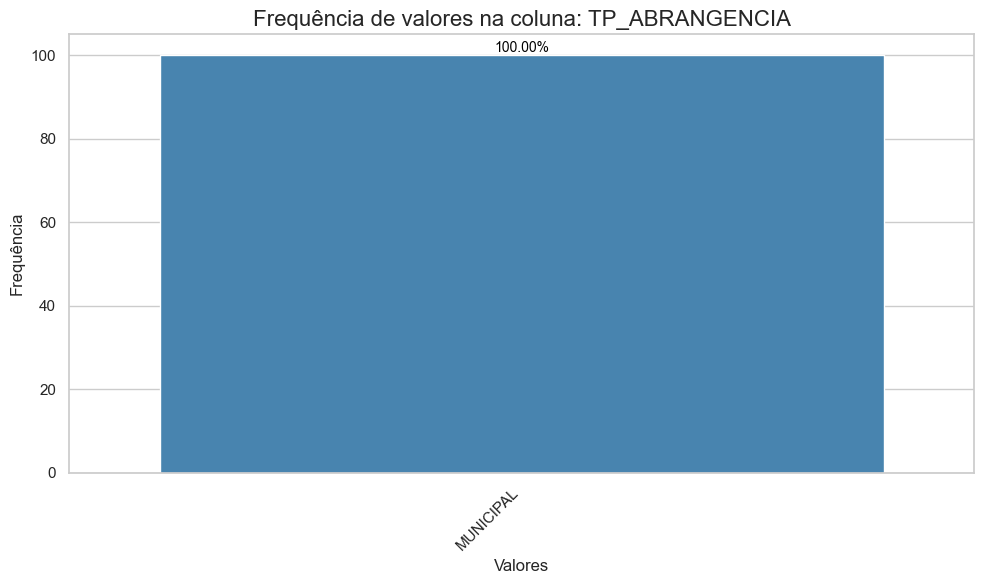

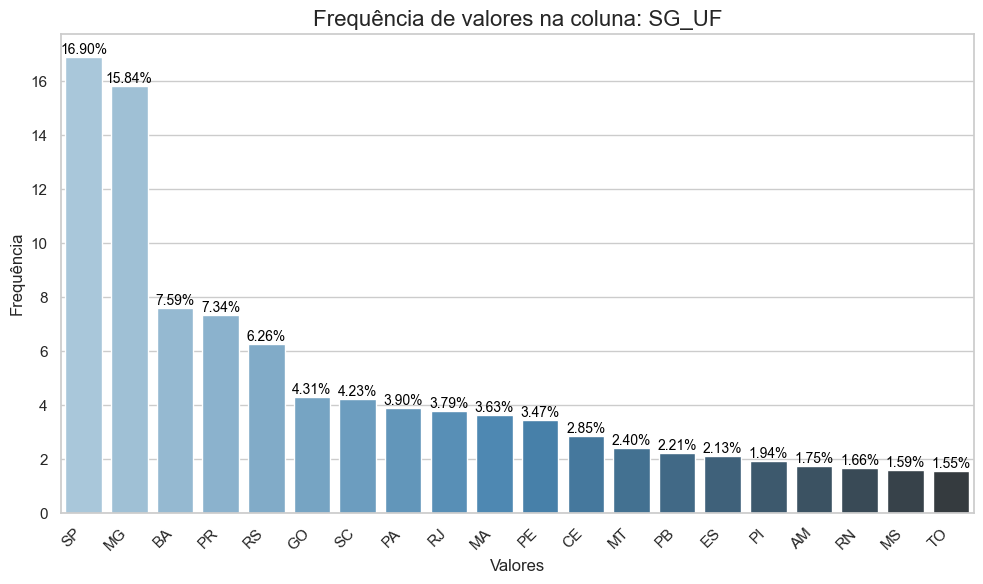

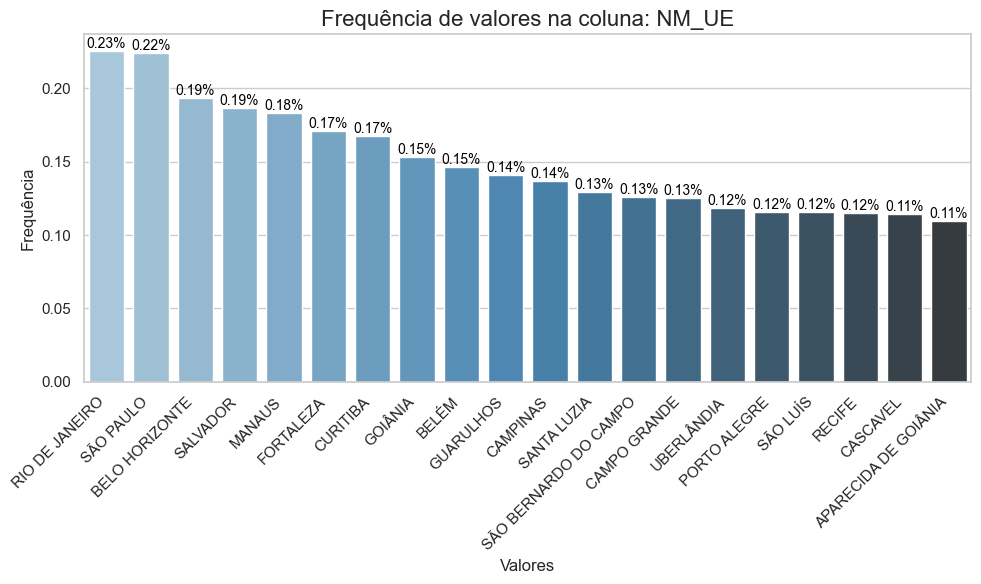

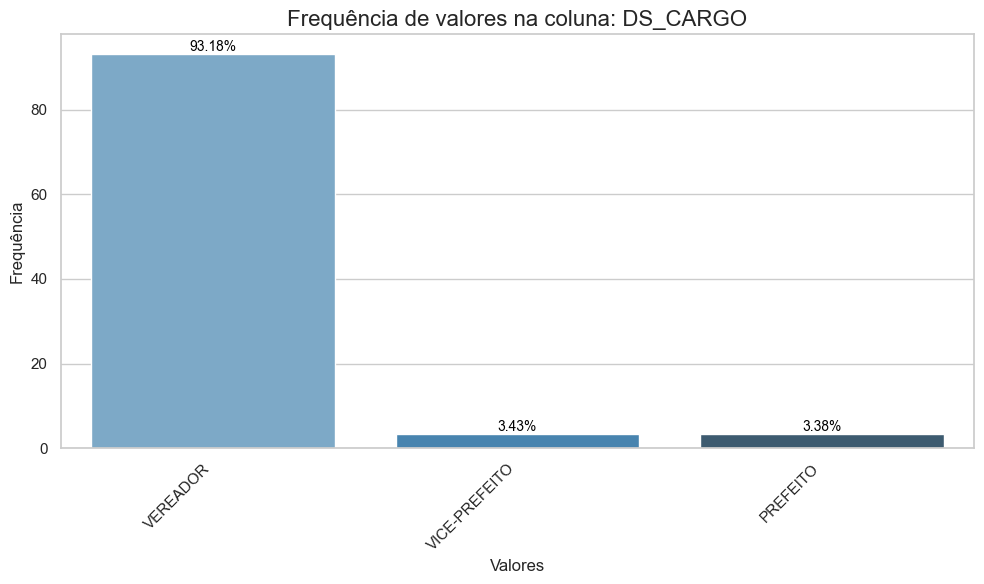

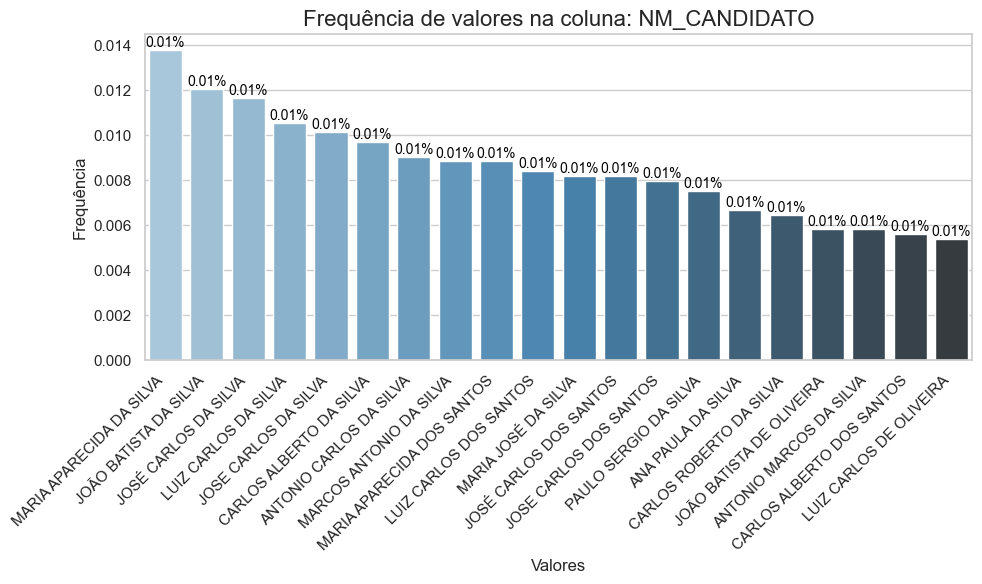

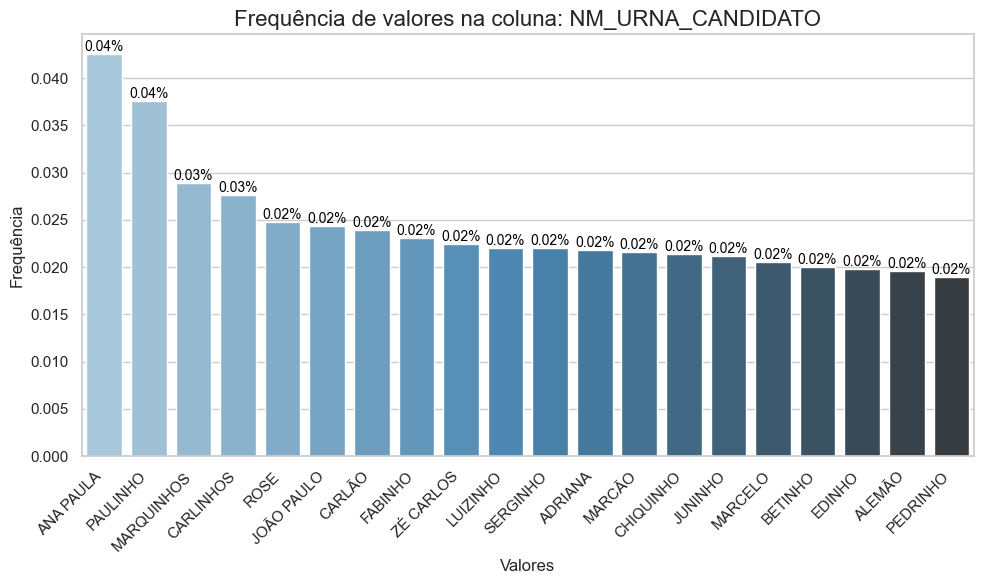

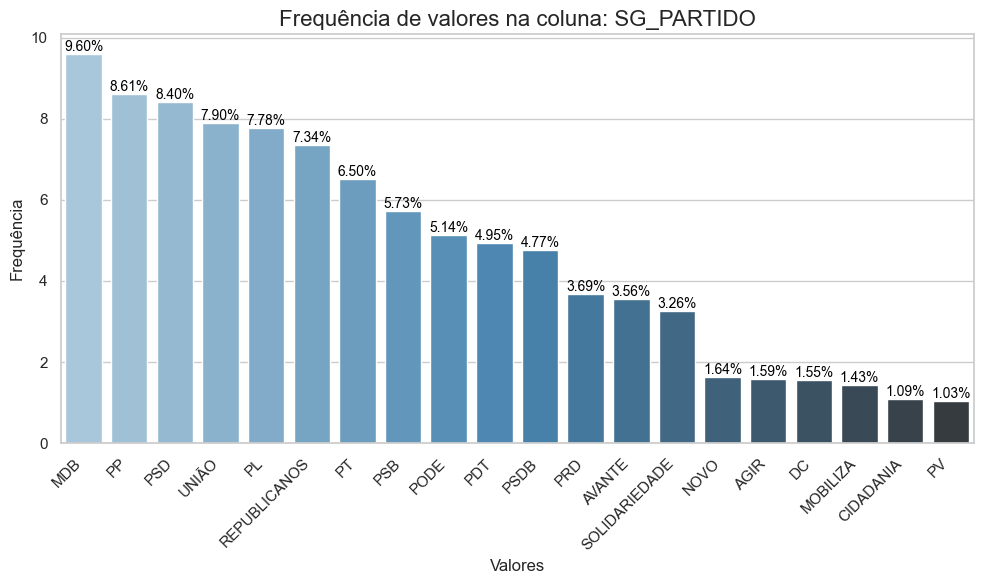

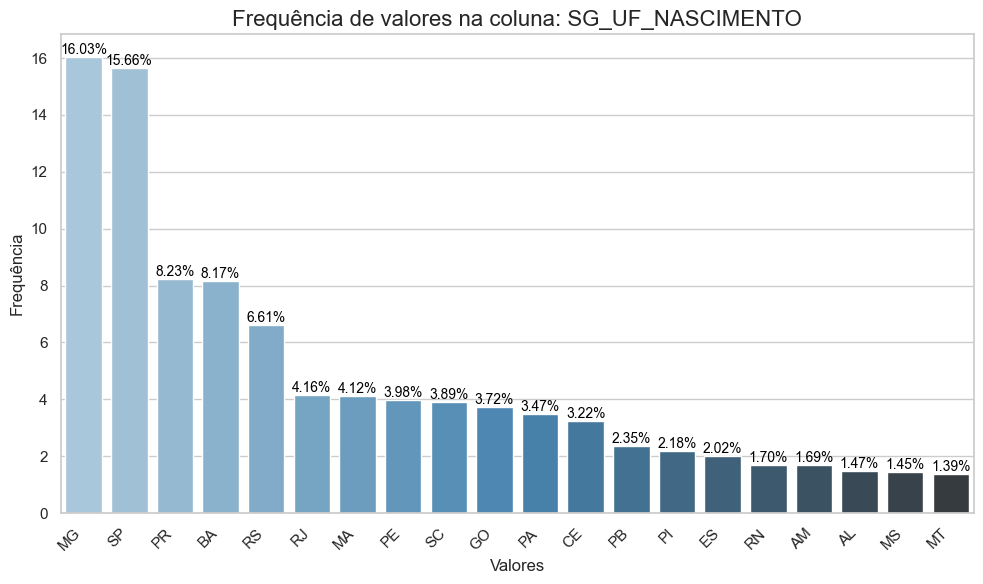

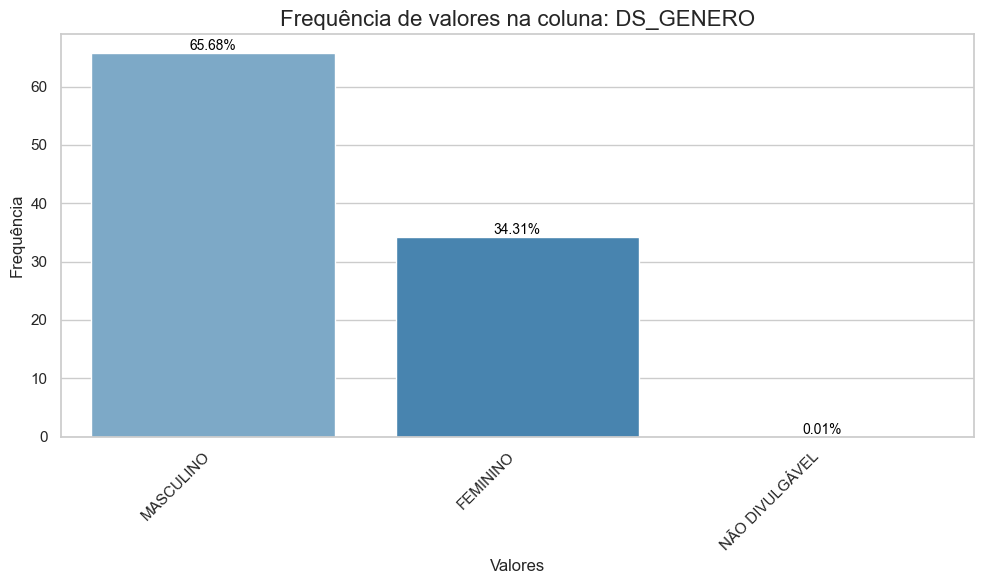

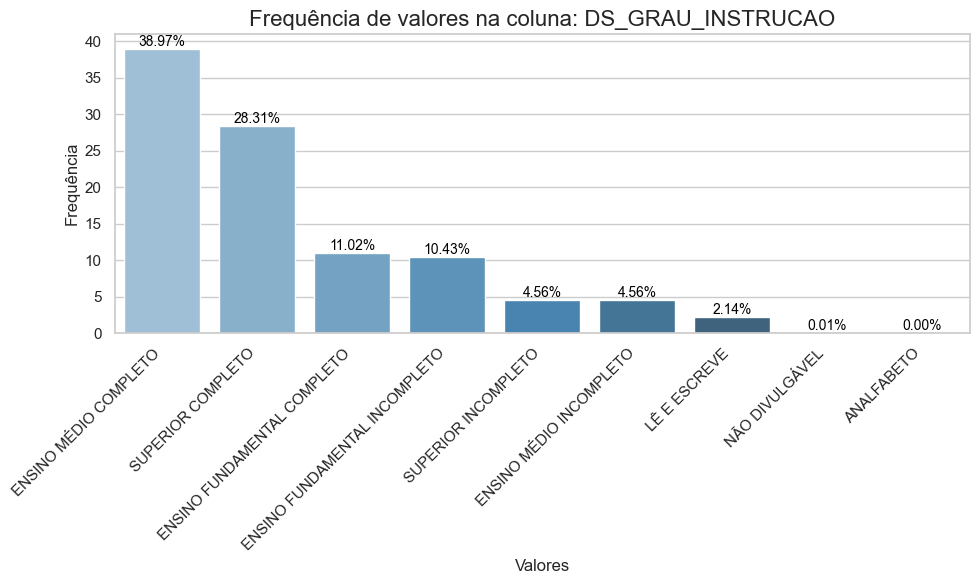

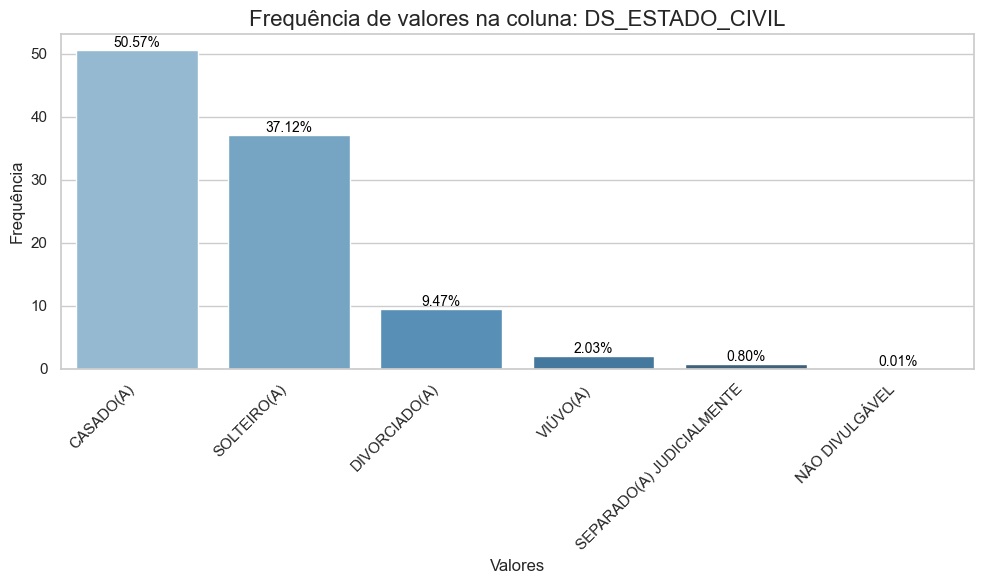

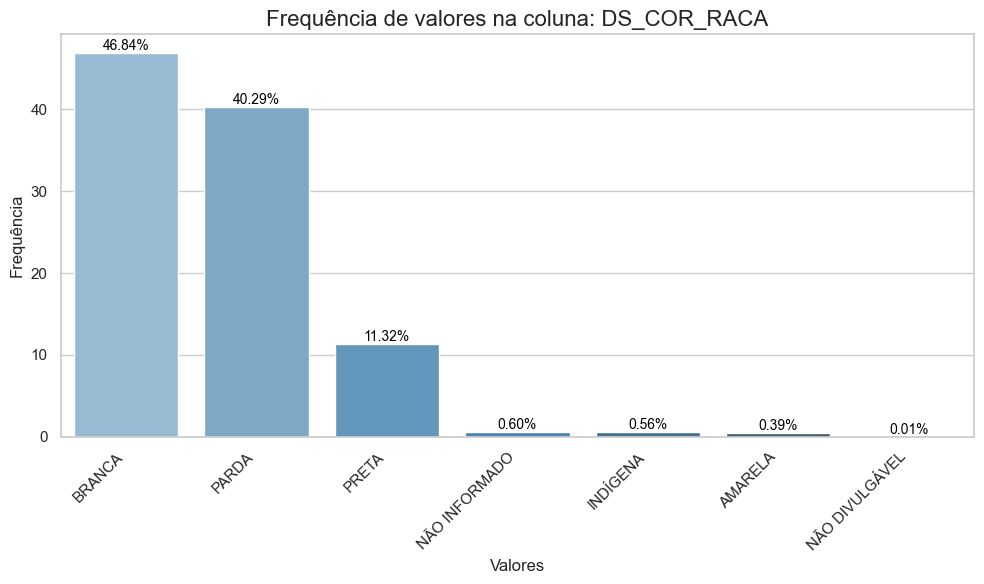

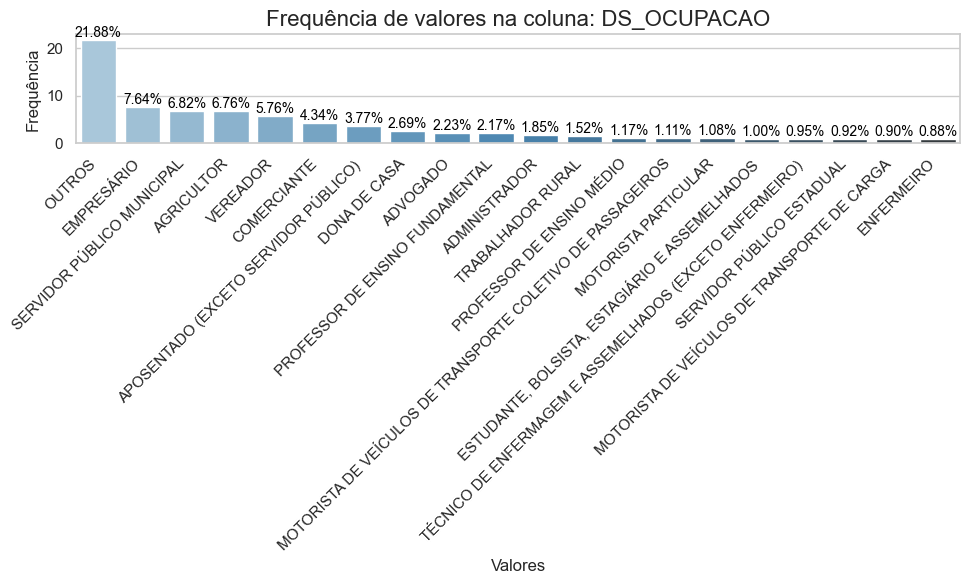

In [33]:
verificar_freq_colunas(df_candidatos)

**O perfil dos candidatos são homens, brancos ou pardos, casados, com Ensino Médio e sem profissão definida (outros)**

### Arquivo de com Dados dos Bens dos Candidatos

In [34]:
df_bens_cand['VR_BEM_CANDIDATO'].describe().reset_index()

index  VR_BEM_CANDIDATO
0  count        910,036.00
1   mean        147,571.97
2    std     12,461,197.39
3    min              0.00
4    25%          8,500.00
5    50%         32,000.00
6    75%        100,000.00
7    max 10,600,250,000.00

In [35]:
df_bens_cand.sort_values('VR_BEM_CANDIDATO', ascending=False).head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO    NM_TIPO_ELEICAO  \
252576 2024-11-21   19:30:20         2024  Eleição Ordinária   
52974  2024-11-21   19:30:20         2024  Eleição Ordinária   
112812 2024-11-21   19:30:20         2024  Eleição Ordinária   
152599 2024-11-21   19:30:20         2024  Eleição Ordinária   
421706 2024-11-21   19:30:20         2024  Eleição Ordinária   

                      DS_ELEICAO DT_ELEICAO SG_UF  SG_UE        NM_UE  \
252576  Eleições Municipais 2024 2024-10-06    MG  46256     IPATINGA   
52974   Eleições Municipais 2024 2024-10-06    SP  66818      MARÍLIA   
112812  Eleições Municipais 2024 2024-10-06    PA   4723        ANAPU   
152599  Eleições Municipais 2024 2024-10-06    RS  86258  DOIS IRMÃOS   
421706  Eleições Municipais 2024 2024-10-06    TO  94994  NOVO ACORDO   

        SQ_CANDIDATO  NR_ORDEM_BEM_CANDIDATO  \
252576  130002211844                       2   
52974   250001937618                       1   
112812  140002233548                       1   
152599  210002201027                       4   
421706  270002288115                       1   

                                    DS_TIPO_BEM_CANDIDATO  \
252576  Ações (inclusive as provenientes de linha tele...   
52974                    Outras participações societárias   
112812                                Outros bens imóveis   
152599                      Quotas ou quinhões de capital   
421706                                            Terreno   

                                         DS_BEM_CANDIDATO  VR_BEM_CANDIDATO  \
252576                                         SWC-220845 10,600,250,000.00   
52974   VR DE 95% DAS COTAS DE CAPITAL DA EMPRESA SUGA...  2,850,000,000.00   
112812             Imóvel rural denominado sítio caujeira  2,415,000,000.00   
152599  1.532.580.097 QUOTAS NA EMPRESA RGSC AMBIENTAL...  1,532,580,097.00   
421706                               FAZENDA 37 ALQUEIRES  1,500,000,000.00   

       DT_ULT_ATUAL_BEM_CANDIDATO HH_ULT_ATUAL_BEM_CANDIDATO  
252576                 2024-10-14                   15:45:39  
52974                  2024-10-15                   14:43:16  
112812                 2024-10-06                   22:05:16  
152599                 2024-10-08                   15:29:47  
421706                 2024-10-06                   20:42:21

In [36]:
max_val = 10 * 1e12
print('O Produto Interno Bruto (PIB) do Brasil no ano de 2023 foi de aproximadamente R$ 10,9 trilhões. ')
print(f'Temos um candidatos com mais de R$ {(max_val/1e12):,.1f} Trilhões em bens?')

O Produto Interno Bruto (PIB) do Brasil no ano de 2023 foi de aproximadamente R$ 10,9 trilhões. 
Temos um candidatos com mais de R$ 10.0 Trilhões em bens?


In [37]:
df_bens_cand = df_bens_cand[df_bens_cand['VR_BEM_CANDIDATO'] < max_val]


In [38]:
df_bens_cand['VR_BEM_CANDIDATO'].describe().reset_index()

index  VR_BEM_CANDIDATO
0  count        910,036.00
1   mean        147,571.97
2    std     12,461,197.39
3    min              0.00
4    25%          8,500.00
5    50%         32,000.00
6    75%        100,000.00
7    max 10,600,250,000.00

In [39]:
#Agrupar o valor dos bens por candidato
df_bens_cand_grouped = df_bens_cand.groupby('SQ_CANDIDATO').agg(
    Valor_Total=('VR_BEM_CANDIDATO', 'sum'),
    Quantidade=('VR_BEM_CANDIDATO', 'count')
).reset_index()

df_bens_cand_grouped.describe()

SQ_CANDIDATO       Valor_Total  Quantidade
count         295,900.00        295,900.00  295,900.00
mean  159,655,024,109.45        453,855.38        3.08
std    68,391,516,872.47     24,289,551.90        3.84
min    10,001,885,335.00              0.00        1.00
25%   110,002,338,663.75         30,000.00        1.00
50%   160,001,920,778.50        111,000.00        2.00
75%   220,002,327,892.50        305,339.34        4.00
max   270,002,404,658.00 12,101,378,759.75      351.00

In [40]:
df_bens_cand_grouped.columns

Index(['SQ_CANDIDATO', 'Valor_Total', 'Quantidade'], dtype='object')

In [41]:
df_bens_cand_grouped[['Valor_Total']].sort_values('Valor_Total',ascending=False).head(10)

Valor_Total
111914 12,101,378,759.75
243131  2,851,300,000.00
138150  2,415,265,000.00
210620  1,542,273,922.21
295015  1,500,180,000.00
45594   1,401,171,000.00
138164  1,200,120,000.00
44283   1,102,131,121.00
5954    1,000,505,000.00
295199    830,780,620.00

### Arquivo de com Dados Complementares dos Candidatos

In [42]:
df_cand_compl.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO  SQ_CANDIDATO DS_DETALHE_SITUACAO_CAND  \
0 2024-11-21   12:30:50         2024  240002389134                      #NE   
1 2024-11-21   12:30:50         2024  250001908920                      #NE   
2 2024-11-21   12:30:50         2024  250002193673                      #NE   
3 2024-11-21   12:30:50         2024   10002024496                      #NE   
4 2024-11-21   12:30:50         2024   20002010454                      #NE   

  DS_NACIONALIDADE NM_MUNICIPIO_NASCIMENTO  NR_IDADE_DATA_POSSE ST_QUILOMBOLA  \
0  BRASILEIRA NATA                 PALHOÇA                35.00             N   
1  BRASILEIRA NATA                 ITAPEVI                52.00             N   
2  BRASILEIRA NATA                  SANTOS                47.00             N   
3  BRASILEIRA NATA                   FEIJÓ                43.00             N   
4  BRASILEIRA NATA           PÃO DE AÇÚCAR                32.00             N   

  DS_ETNIA_INDIGENA  VR_DESPESA_MAX_CAMPANHA ST_REELEICAO ST_DECLARAR_BENS  \
0     NÃO INFORMADO                    -1.00            N                N   
1     NÃO INFORMADO               139,551.52            N                S   
2            #NULO#               360,961.85            N                S   
3     NÃO INFORMADO                24,130.17            N                N   
4            #NULO#                15,985.08            S                S   

   NR_PROTOCOLO_CANDIDATURA          NR_PROCESSO DS_SITUACAO_CANDIDATO_PLEITO  \
0                        -1  6002448720246240024                          #NE   
1                        -1  6002129020246260359                          #NE   
2                        -1  6002714220246260177                          #NE   
3                        -1  6000637920246010007                          #NE   
4                        -1  6000954520246020011                          #NE   

  DS_SITUACAO_CANDIDATO_URNA ST_CANDIDATO_INSERIDO_URNA  \
0                        #NE                        SIM   
1                        #NE                        SIM   
2                        #NE                        SIM   
3                        #NE                        SIM   
4                        #NE                        SIM   

  NM_TIPO_DESTINACAO_VOTOS DS_SITUACAO_CANDIDATO_TOT ST_PREST_CONTAS  \
0                   #NULO#                  DEFERIDO               N   
1                   Válido                  DEFERIDO               S   
2                   Válido                  DEFERIDO               S   
3                   Válido                  DEFERIDO               S   
4                   Válido                  DEFERIDO               S   

  ST_SUBSTITUIDO  SQ_SUBSTITUIDO  SQ_ORDEM_SUPLENCIA DT_ACEITE_CANDIDATURA  \
0              N              -1                   1                   NaT   
1              N              -1                   7                   NaT   
2              N              -1                  -1                   NaT   
3              N              -1                   4                   NaT   
4              N              -1                  -1                   NaT   

  DS_SITUACAO_JULGAMENTO DS_SITUACAO_JULGAMENTO_PLEITO  \
0               DEFERIDO                      DEFERIDO   
1               DEFERIDO                      DEFERIDO   
2               DEFERIDO                      DEFERIDO   
3               DEFERIDO                      DEFERIDO   
4               DEFERIDO                      DEFERIDO   

  DS_SITUACAO_JULGAMENTO_URNA DS_SITUACAO_CASSACAO DS_SITUACAO_CASSACAO_MIDIA  \
0                    DEFERIDO               #NULO#                     #NULO#   
1                    DEFERIDO               #NULO#                     #NULO#   
2                    DEFERIDO               #NULO#                     #NULO#   
3                    DEFERIDO               #NULO#                     #NULO#   
4                    DEFERIDO               #NULO#                     #N

In [43]:
df_cand_compl.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'SQ_CANDIDATO',
       'DS_DETALHE_SITUACAO_CAND', 'DS_NACIONALIDADE',
       'NM_MUNICIPIO_NASCIMENTO', 'NR_IDADE_DATA_POSSE', 'ST_QUILOMBOLA',
       'DS_ETNIA_INDIGENA', 'VR_DESPESA_MAX_CAMPANHA', 'ST_REELEICAO',
       'ST_DECLARAR_BENS', 'NR_PROTOCOLO_CANDIDATURA', 'NR_PROCESSO',
       'DS_SITUACAO_CANDIDATO_PLEITO', 'DS_SITUACAO_CANDIDATO_URNA',
       'ST_CANDIDATO_INSERIDO_URNA', 'NM_TIPO_DESTINACAO_VOTOS',
       'DS_SITUACAO_CANDIDATO_TOT', 'ST_PREST_CONTAS', 'ST_SUBSTITUIDO',
       'SQ_SUBSTITUIDO', 'SQ_ORDEM_SUPLENCIA', 'DT_ACEITE_CANDIDATURA',
       'DS_SITUACAO_JULGAMENTO', 'DS_SITUACAO_JULGAMENTO_PLEITO',
       'DS_SITUACAO_JULGAMENTO_URNA', 'DS_SITUACAO_CASSACAO',
       'DS_SITUACAO_CASSACAO_MIDIA', 'DS_SITUACAO_DIPLOMA'],
      dtype='object')

In [44]:
#Excluindo campos não necessários / repetidos
df_cand_compl.drop(columns=['DT_GERACAO','HH_GERACAO','ANO_ELEICAO',
                            'DS_DETALHE_SITUACAO_CAND',
                            'NR_PROTOCOLO_CANDIDATURA', 'NR_PROCESSO',
                            'DS_SITUACAO_CANDIDATO_PLEITO', 'DS_SITUACAO_CANDIDATO_URNA',
                            'ST_CANDIDATO_INSERIDO_URNA',
                            'ST_PREST_CONTAS', 'ST_SUBSTITUIDO',
                            'SQ_SUBSTITUIDO', 'SQ_ORDEM_SUPLENCIA', 'DT_ACEITE_CANDIDATURA',
                            'DS_SITUACAO_JULGAMENTO', 'DS_SITUACAO_JULGAMENTO_PLEITO',
                            'DS_SITUACAO_JULGAMENTO_URNA', 'DS_SITUACAO_CASSACAO',
                            'DS_SITUACAO_CASSACAO_MIDIA', 'DS_SITUACAO_DIPLOMA',
                            'NM_TIPO_DESTINACAO_VOTOS'
                            ], axis=1, inplace=True)


In [45]:
df_cand_compl.head()

SQ_CANDIDATO DS_NACIONALIDADE NM_MUNICIPIO_NASCIMENTO  NR_IDADE_DATA_POSSE  \
0  240002389134  BRASILEIRA NATA                 PALHOÇA                35.00   
1  250001908920  BRASILEIRA NATA                 ITAPEVI                52.00   
2  250002193673  BRASILEIRA NATA                  SANTOS                47.00   
3   10002024496  BRASILEIRA NATA                   FEIJÓ                43.00   
4   20002010454  BRASILEIRA NATA           PÃO DE AÇÚCAR                32.00   

  ST_QUILOMBOLA DS_ETNIA_INDIGENA  VR_DESPESA_MAX_CAMPANHA ST_REELEICAO  \
0             N     NÃO INFORMADO                    -1.00            N   
1             N     NÃO INFORMADO               139,551.52            N   
2             N            #NULO#               360,961.85            N   
3             N     NÃO INFORMADO                24,130.17            N   
4             N            #NULO#                15,985.08            S   

  ST_DECLARAR_BENS DS_SITUACAO_CANDIDATO_TOT  
0                N                  DEFERIDO  
1                S                  DEFERIDO  
2                S                  DEFERIDO  
3                N                  DEFERIDO  
4                S                  DEFERIDO

In [46]:
object_columns = df_cand_compl.select_dtypes(include='object').columns

# Substituir '#NULO#' por NaN nas colunas do tipo object
df_cand_compl[object_columns] = df_cand_compl[object_columns].replace('#NULO#', np.nan)
df_cand_compl[object_columns] = df_cand_compl[object_columns].replace('NÃO INFORMADO', np.nan)


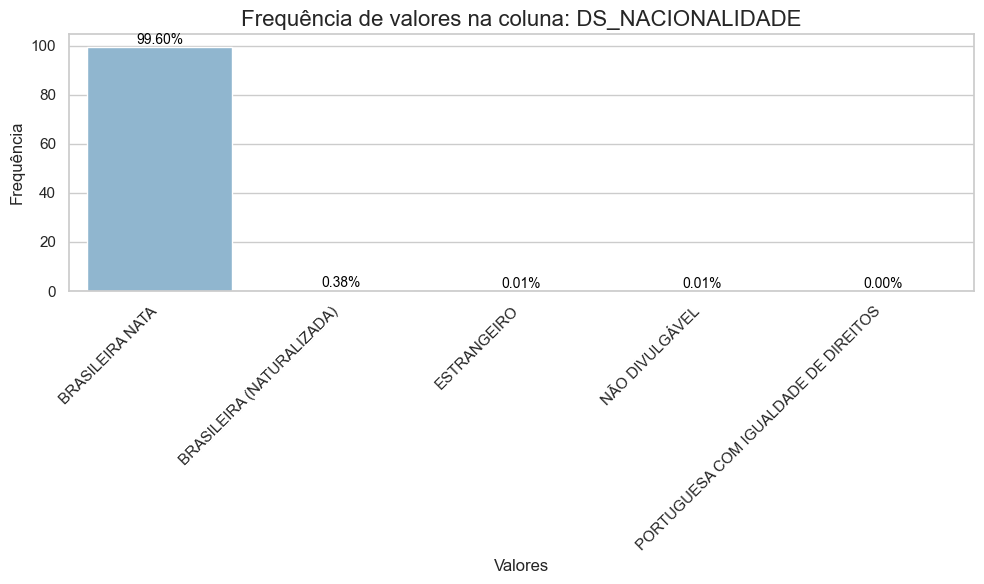

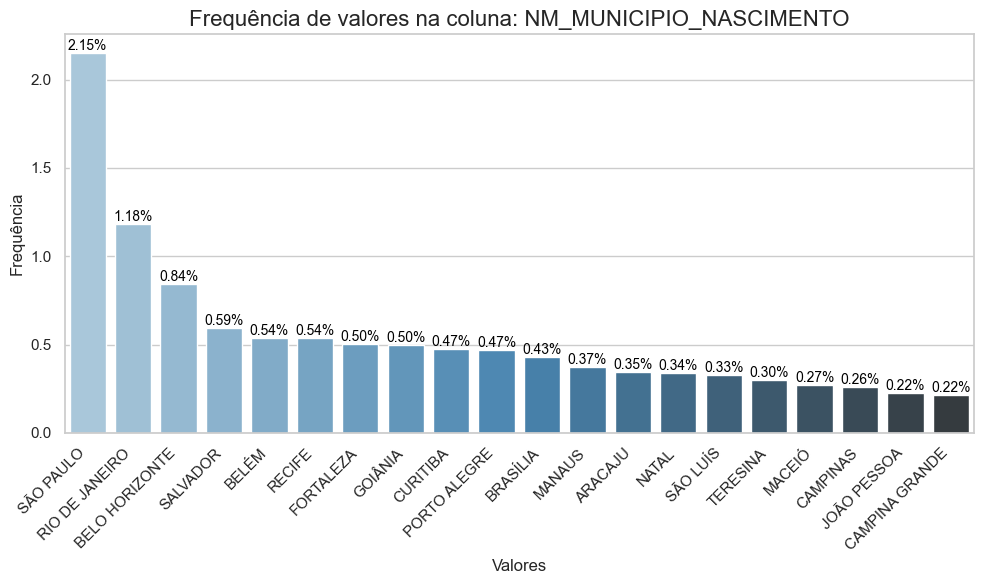

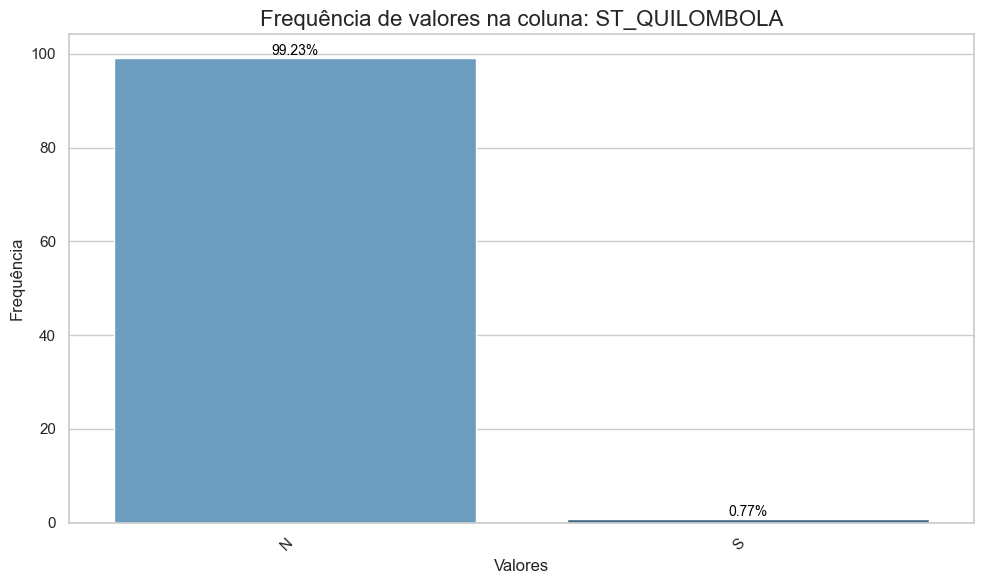

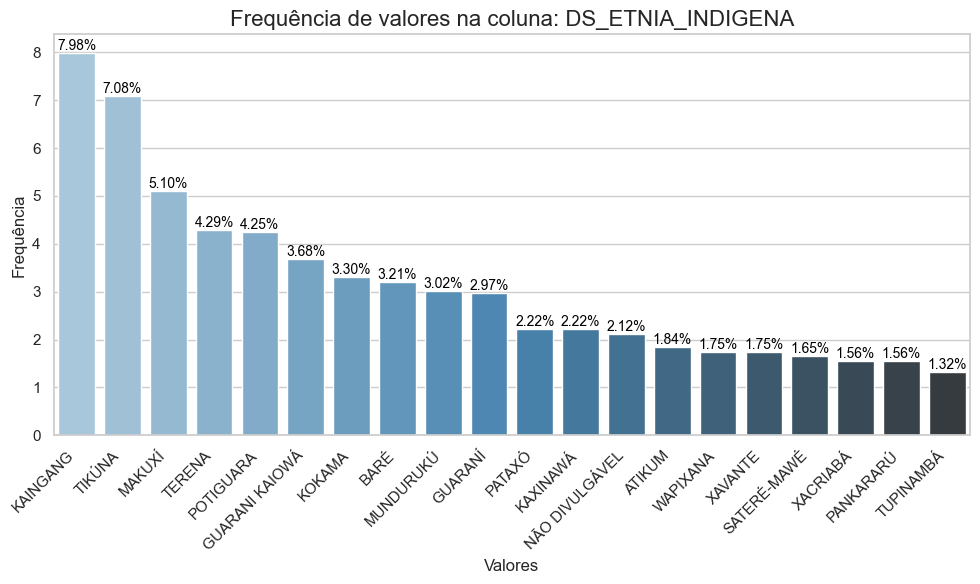

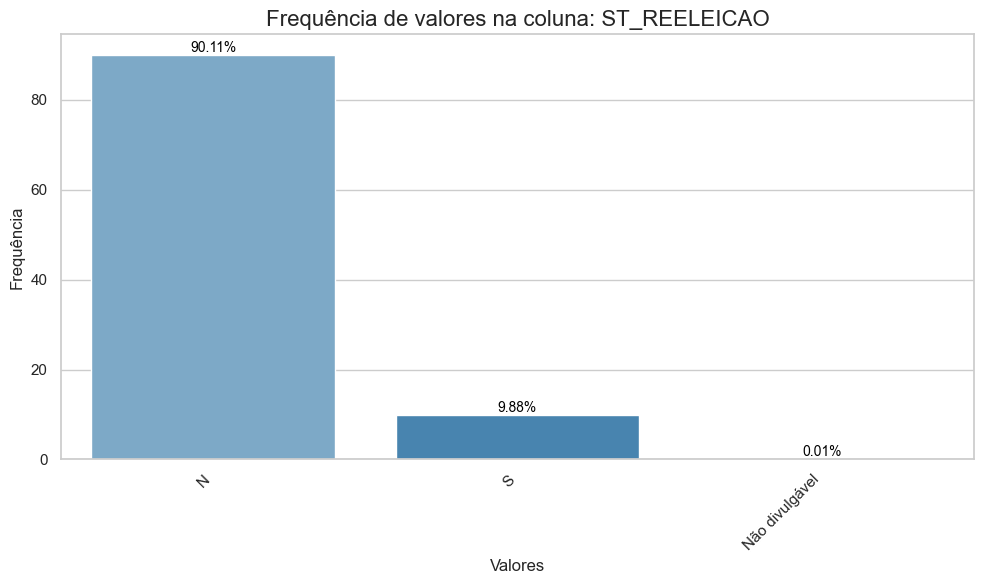

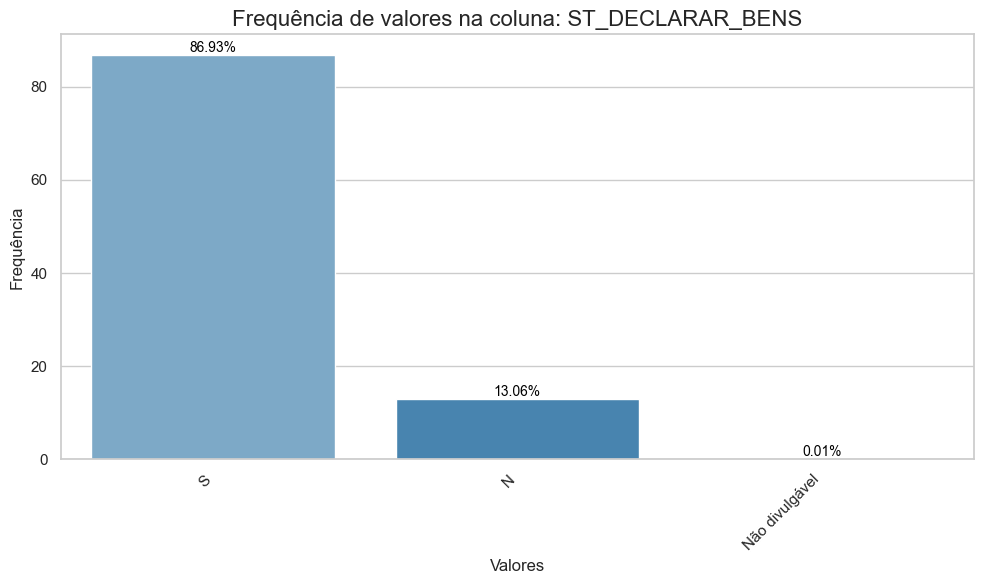

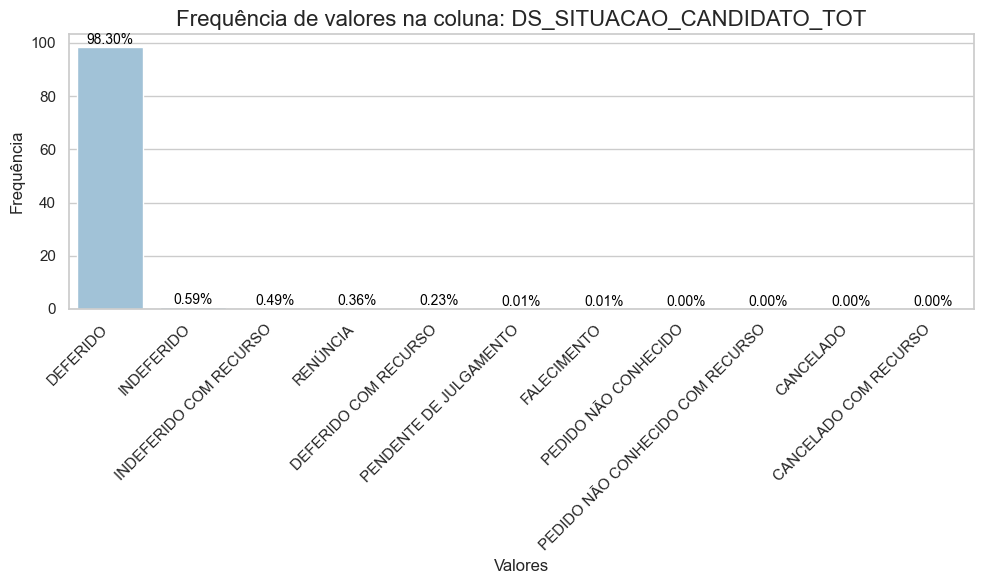

In [47]:
verificar_freq_colunas(df_cand_compl)

**O perfil dos candidatos também é formado por nascidos em São Paulo, declararam bens, e não estão em releeição**

### Unindo os arquivos

In [48]:
#Juntando os Dataframes
df_candidatos = df_candidatos.merge(df_cand_compl, on='SQ_CANDIDATO', how='left')

df_candidatos = df_candidatos.merge(df_bens_cand_grouped, on='SQ_CANDIDATO', how='left')

df_candidatos.head()

TP_ABRANGENCIA SG_UF                NM_UE       DS_CARGO  SQ_CANDIDATO  \
0      MUNICIPAL    RJ             MESQUITA  VICE-PREFEITO  190002260099   
1      MUNICIPAL    MG                BETIM       VEREADOR  130002398322   
2      MUNICIPAL    PA               JURUTI       VEREADOR  140002405317   
3      MUNICIPAL    MG  SANTANA DO MANHUAÇU       VEREADOR  130002371691   
4      MUNICIPAL    PE              AMARAJI       VEREADOR  170002214653   

   NR_CANDIDATO                           NM_CANDIDATO      NM_URNA_CANDIDATO  \
0            15  FERNANDO EDUARDO MIQUELOTTI GONÇALVES  DR FERNANDO GONÇALVES   
1         33223                 LUZIA NATALICIA FONTES                  ALICE   
2         13113                ALCILENE MOTA DO SANTOS          ALCILENE MOTA   
3         15015                  JOSÉ ROBERTO DE SOUZA     BETINHO DA JACINTO   
4         18111                 RUY FRANCISCO DA SILVA           RUY DA SAÚDE   

  SG_PARTIDO SG_UF_NASCIMENTO DT_NASCIMENTO  DS_GENERO  \
0        MDB               RJ    1982-04-14  MASCULINO   
1   MOBILIZA               MG    1967-12-13   FEMININO   
2         PT               PA    1976-08-17   FEMININO   
3        MDB               MG    1975-07-28  MASCULINO   
4       REDE               PE    1957-02-02  MASCULINO   

               DS_GRAU_INSTRUCAO DS_ESTADO_CIVIL DS_COR_RACA  \
0              SUPERIOR COMPLETO       CASADO(A)      BRANCA   
1              SUPERIOR COMPLETO       CASADO(A)       PARDA   
2              SUPERIOR COMPLETO     SOLTEIRO(A)       PARDA   
3  ENSINO FUNDAMENTAL INCOMPLETO       CASADO(A)       PARDA   
4          ENSINO MÉDIO COMPLETO   DIVORCIADO(A)       PARDA   

                       DS_OCUPACAO DS_NACIONALIDADE NM_MUNICIPIO_NASCIMENTO  \
0                           MÉDICO  BRASILEIRA NATA             NOVA IGUAÇU   
1                          ARTESÃO  BRASILEIRA NATA              BRUMADINHO   
2  PROFESSOR DE ENSINO FUNDAMENTAL  BRASILEIRA NATA                  JURUTI   
3                           OUTROS  BRASILEIRA NATA     SANTANA DO MANHUAÇU   
4                           OUTROS  BRASILEIRA NATA               GAMELEIRA   

   NR_IDADE_DATA_POSSE ST_QUILOMBOLA DS_ETNIA_INDIGENA  \
0                42.00             N               NaN   
1                57.00             N               NaN   
2                48.00             N               NaN   
3                49.00             N               NaN   
4                67.00             N               NaN   

   VR_DESPESA_MAX_CAMPANHA ST_REELEICAO ST_DECLARAR_BENS  \
0                    -1.00            N                S   
1               337,099.52            N                S   
2                64,814.69            N                S   
3                15,985.08            N                S   
4                15,985.08            N                S   

  DS_SITUACAO_CANDIDATO_TOT  Valor_Total  Quantidade  
0                INDEFERIDO   726,600.35        5.00  
1                INDEFERIDO          NaN         NaN  
2                INDEFERIDO          NaN         NaN  
3                INDEFERIDO    57,500.00        3.00  
4                INDEFERIDO    70,000.00        1.00

In [49]:
df_candidatos.columns

Index(['TP_ABRANGENCIA', 'SG_UF', 'NM_UE', 'DS_CARGO', 'SQ_CANDIDATO',
       'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO',
       'SG_UF_NASCIMENTO', 'DT_NASCIMENTO', 'DS_GENERO', 'DS_GRAU_INSTRUCAO',
       'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_OCUPACAO', 'DS_NACIONALIDADE',
       'NM_MUNICIPIO_NASCIMENTO', 'NR_IDADE_DATA_POSSE', 'ST_QUILOMBOLA',
       'DS_ETNIA_INDIGENA', 'VR_DESPESA_MAX_CAMPANHA', 'ST_REELEICAO',
       'ST_DECLARAR_BENS', 'DS_SITUACAO_CANDIDATO_TOT', 'Valor_Total',
       'Quantidade'],
      dtype='object')

In [50]:
df_candidatos.isna().sum()

TP_ABRANGENCIA                    0
SG_UF                             0
NM_UE                             0
DS_CARGO                          0
SQ_CANDIDATO                      0
NR_CANDIDATO                      0
NM_CANDIDATO                      0
NM_URNA_CANDIDATO                 1
SG_PARTIDO                        0
SG_UF_NASCIMENTO                  0
DT_NASCIMENTO                    48
DS_GENERO                         0
DS_GRAU_INSTRUCAO                 0
DS_ESTADO_CIVIL                   0
DS_COR_RACA                       0
DS_OCUPACAO                       0
DS_NACIONALIDADE                  0
NM_MUNICIPIO_NASCIMENTO           0
NR_IDADE_DATA_POSSE              45
ST_QUILOMBOLA                     0
DS_ETNIA_INDIGENA            461887
VR_DESPESA_MAX_CAMPANHA           0
ST_REELEICAO                      0
ST_DECLARAR_BENS                  0
DS_SITUACAO_CANDIDATO_TOT     13614
Valor_Total                  167515
Quantidade                   167515
dtype: int64

In [51]:
df_candidatos['Valor_Total'].fillna(0, inplace=True)
df_candidatos['Quantidade'].fillna(0, inplace=True)

df_candidatos['DS_ETNIA_INDIGENA'].fillna('-', inplace=True)

df_candidatos.drop(columns='DS_SITUACAO_CANDIDATO_TOT', inplace=True)

df_candidatos.dropna(inplace=True)

/var/folders/c_/_zrwpzh91bx6fwnhhrvr_w300000gn/T/ipykernel_33944/1251829275.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_candidatos['Valor_Total'].fillna(0, inplace=True)
/var/folders/c_/_zrwpzh91bx6fwnhhrvr_w300000gn/T/ipykernel_33944/1251829275.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [52]:
df_candidatos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463957 entries, 0 to 464005
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TP_ABRANGENCIA           463957 non-null  object        
 1   SG_UF                    463957 non-null  object        
 2   NM_UE                    463957 non-null  object        
 3   DS_CARGO                 463957 non-null  object        
 4   SQ_CANDIDATO             463957 non-null  int64         
 5   NR_CANDIDATO             463957 non-null  int64         
 6   NM_CANDIDATO             463957 non-null  object        
 7   NM_URNA_CANDIDATO        463957 non-null  object        
 8   SG_PARTIDO               463957 non-null  object        
 9   SG_UF_NASCIMENTO         463957 non-null  object        
 10  DT_NASCIMENTO            463957 non-null  datetime64[ns]
 11  DS_GENERO                463957 non-null  object        
 12  DS_GRAU_INSTRUCAO    

In [53]:

df_candidatos.rename(columns={'SG_UF':'UF',
                              'NM_UE':'Cidade',
                              'DS_CARGO':'Cargo',
                              'NM_CANDIDATO':'Nome do Candidato',
                              'SG_PARTIDO':'Sigla Partido',
                              'NM_PARTIDO':'Nome Partido',
                              'SG_UF_NASCIMENTO':'UF Nascimento',
                              'DS_GENERO':'Genero',
                              'DS_GRAU_INSTRUCAO':'Grau de Instrução',
                              'DS_ESTADO_CIVIL':'Estado Civil',
                              'DS_COR_RACA':'Cor / Raça',
                              'DS_OCUPACAO':'Ocupação',
                              'DS_NACIONALIDADE':'Nacionalidade',
                              'NM_MUNICIPIO_NASCIMENTO':'Município Nascimento',
                              'NR_IDADE_DATA_POSSE':'Idade na Posse',
                              'ST_QUILOMBOLA': 'É quilombolo',
                              'DS_ETNIA_INDIGENA':'Etinia Indigena',
                              'VR_DESPESA_MAX_CAMPANHA':'Despesa Max Campanha',
                              'ST_REELEICAO':'É releição',
                              'ST_DECLARAR_BENS':'Declarou Bens',
                              'Valor_Total':'Valor Total Bens',
                              'Quantidade':'Quantidade de Bens'
                              }, inplace=True)

In [54]:
df_candidatos.columns

Index(['TP_ABRANGENCIA', 'UF', 'Cidade', 'Cargo', 'SQ_CANDIDATO',
       'NR_CANDIDATO', 'Nome do Candidato', 'NM_URNA_CANDIDATO',
       'Sigla Partido', 'UF Nascimento', 'DT_NASCIMENTO', 'Genero',
       'Grau de Instrução', 'Estado Civil', 'Cor / Raça', 'Ocupação',
       'Nacionalidade', 'Município Nascimento', 'Idade na Posse',
       'É quilombolo', 'Etinia Indigena', 'Despesa Max Campanha', 'É releição',
       'Declarou Bens', 'Valor Total Bens', 'Quantidade de Bens'],
      dtype='object')

In [55]:
df_candidatos['Quantidade'] = 1

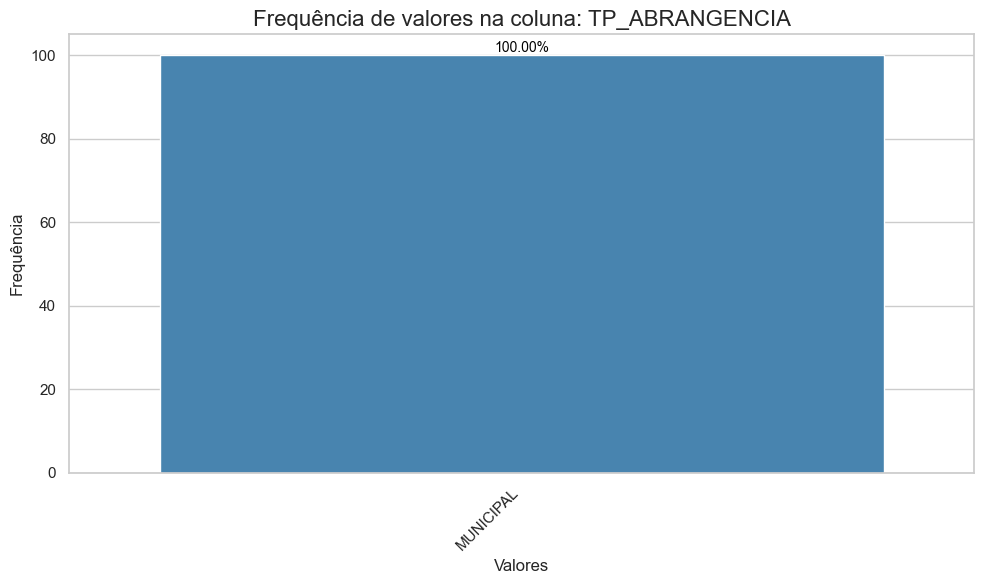

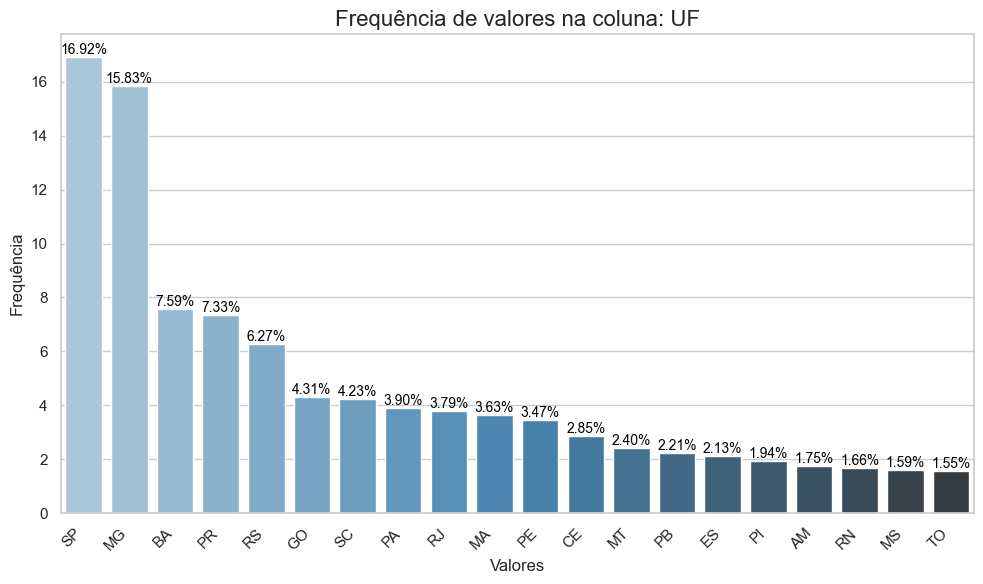

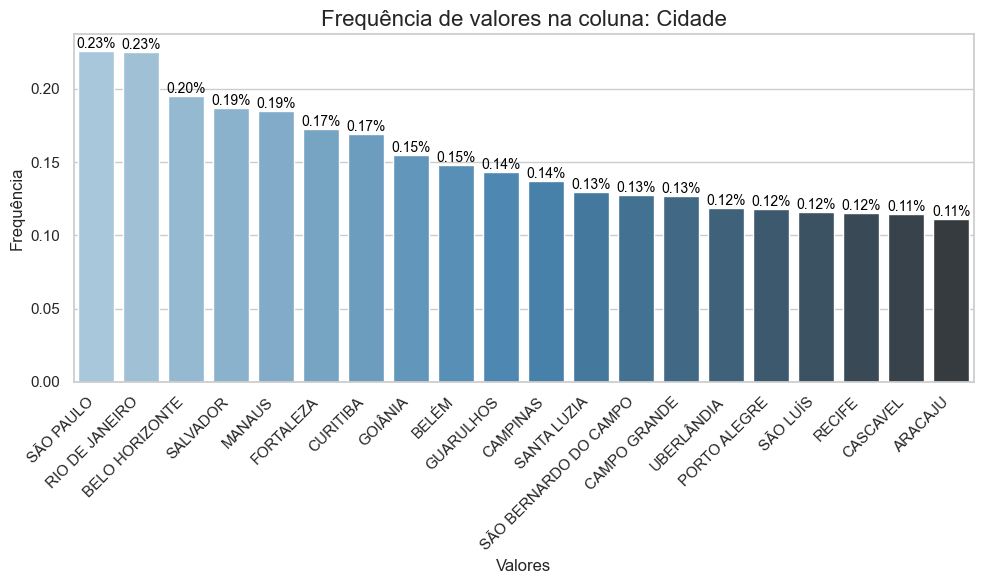

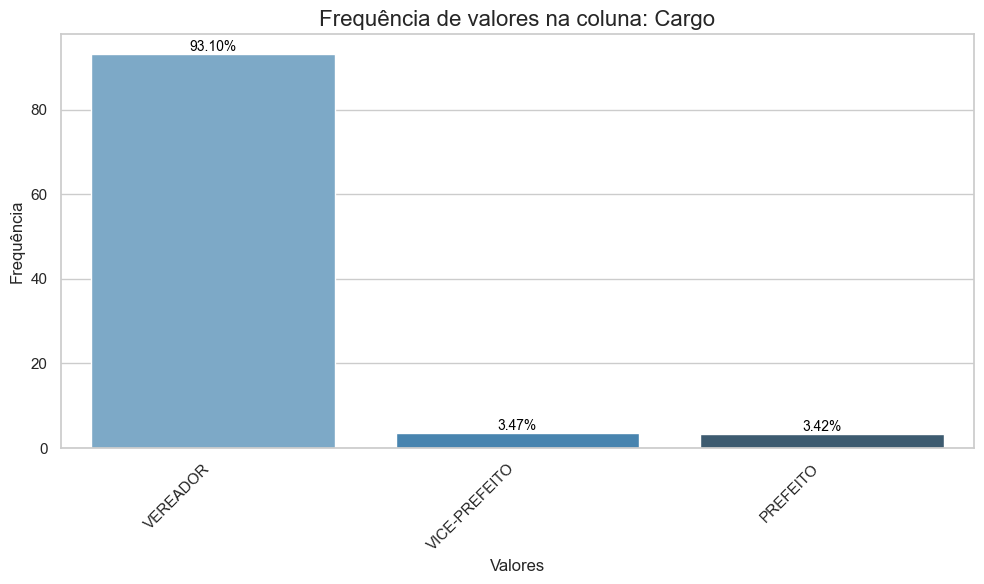

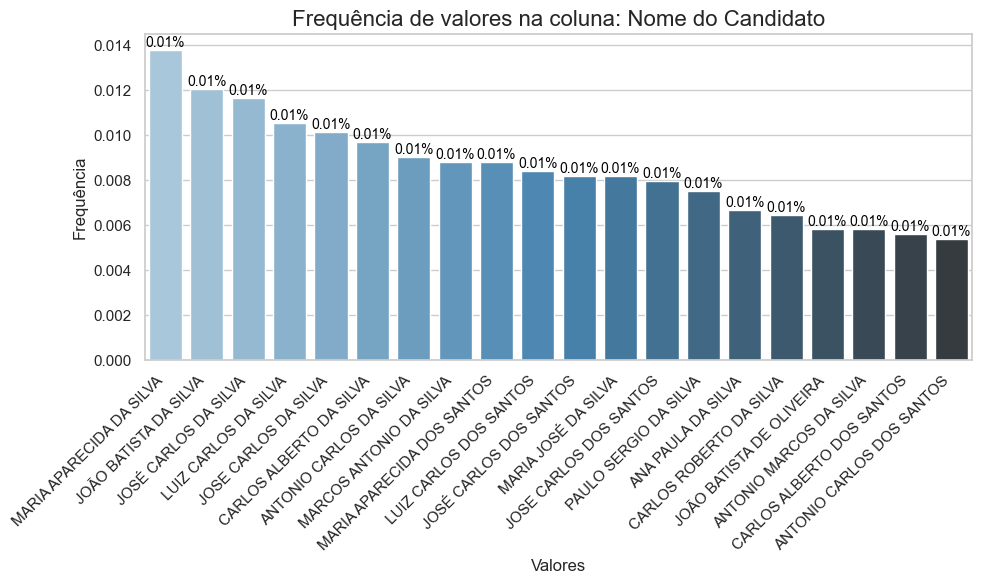

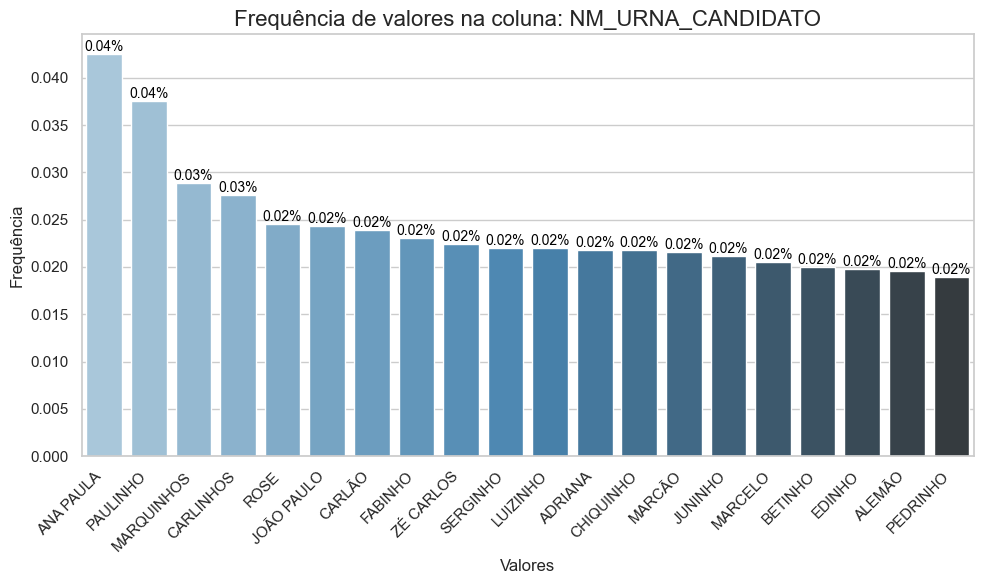

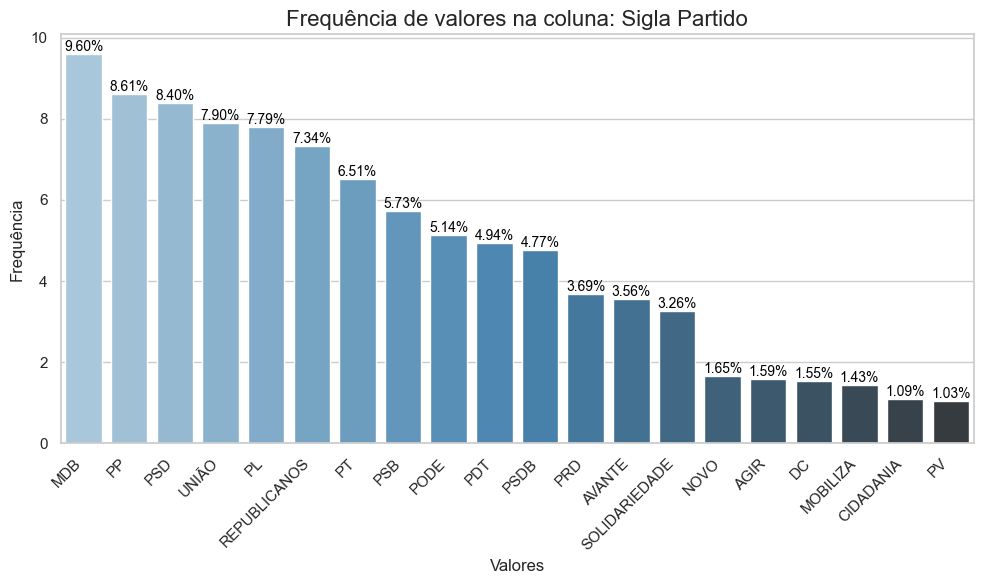

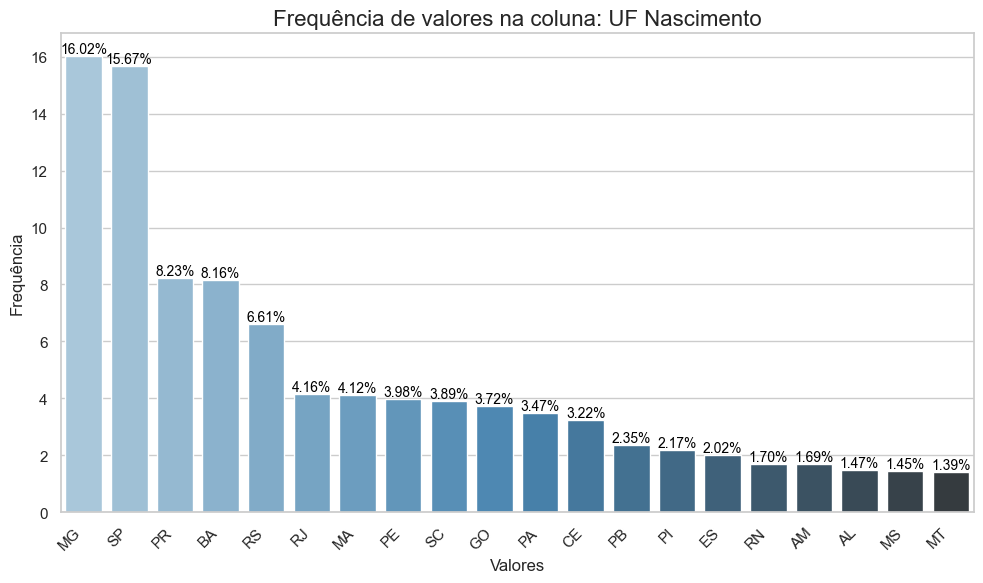

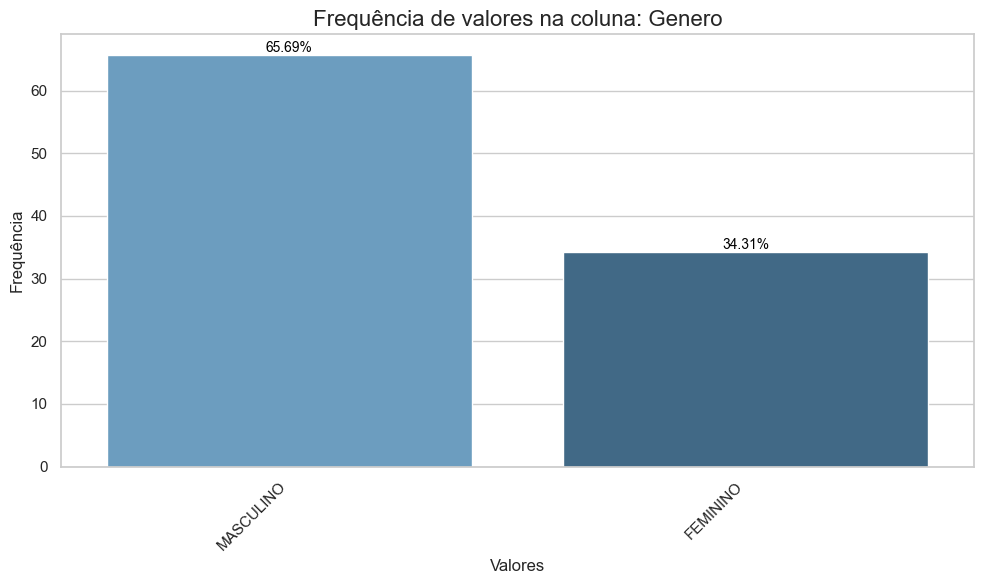

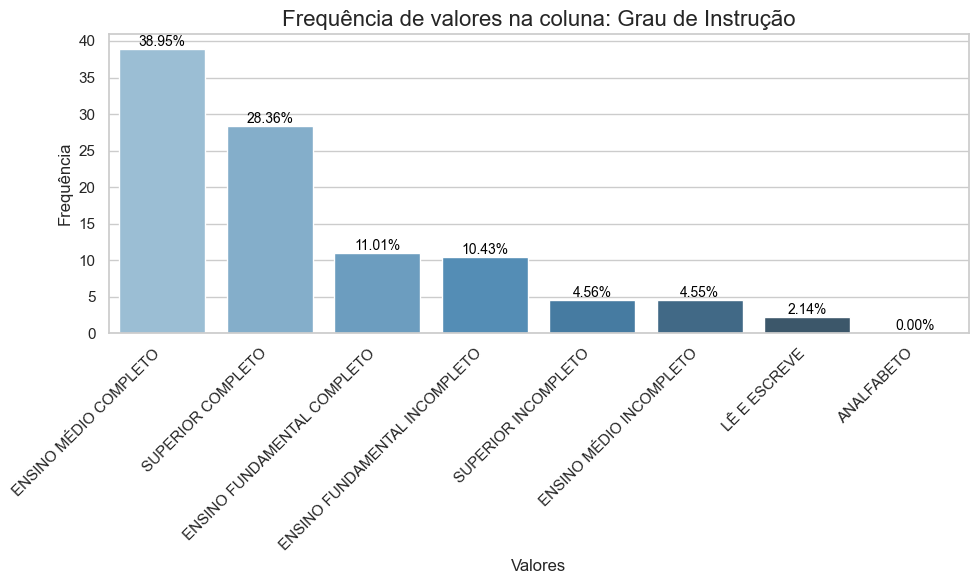

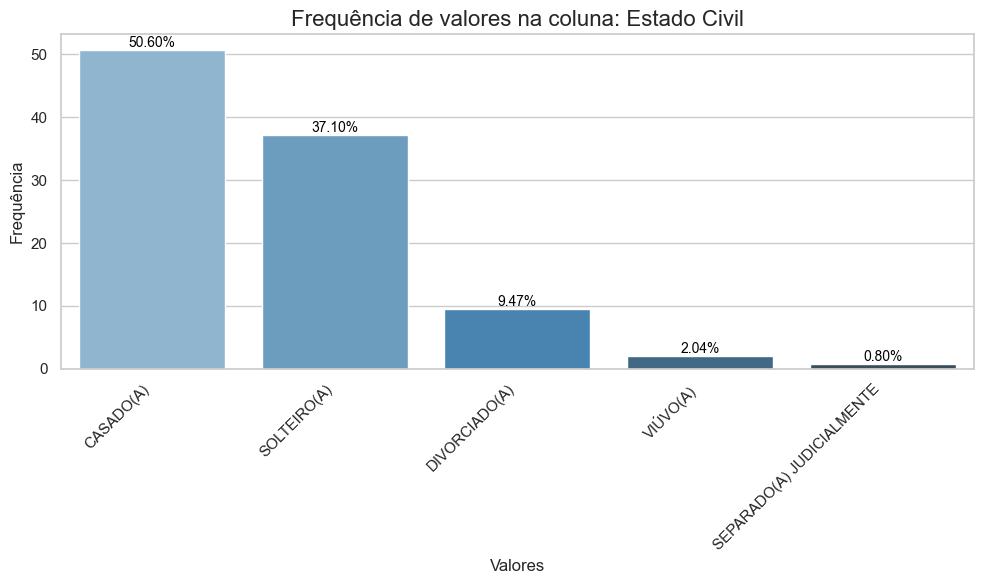

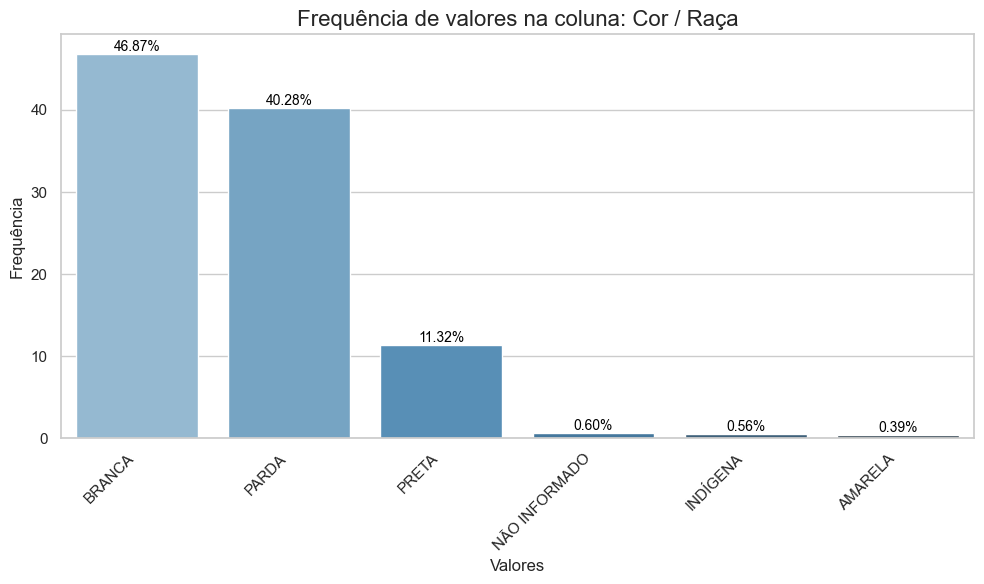

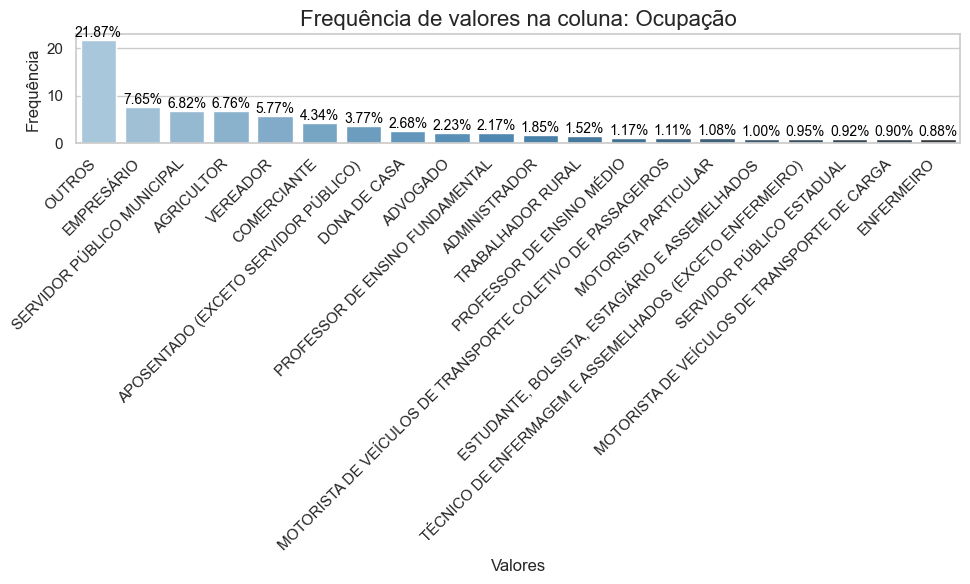

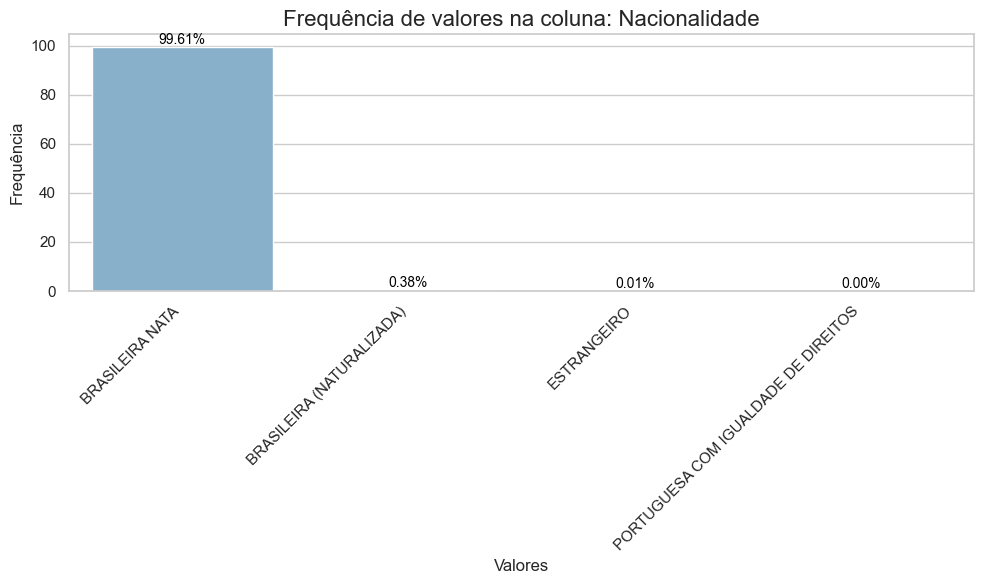

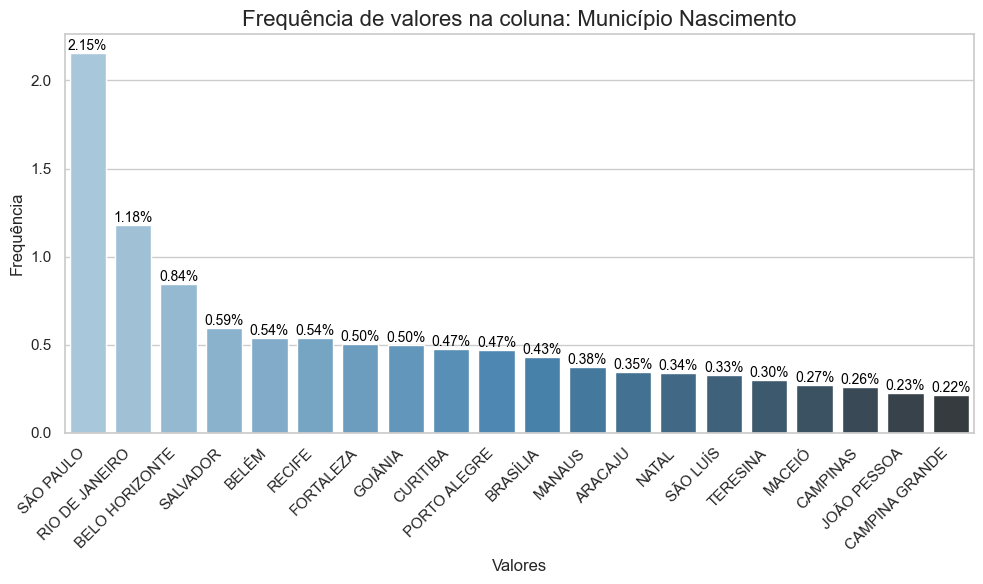

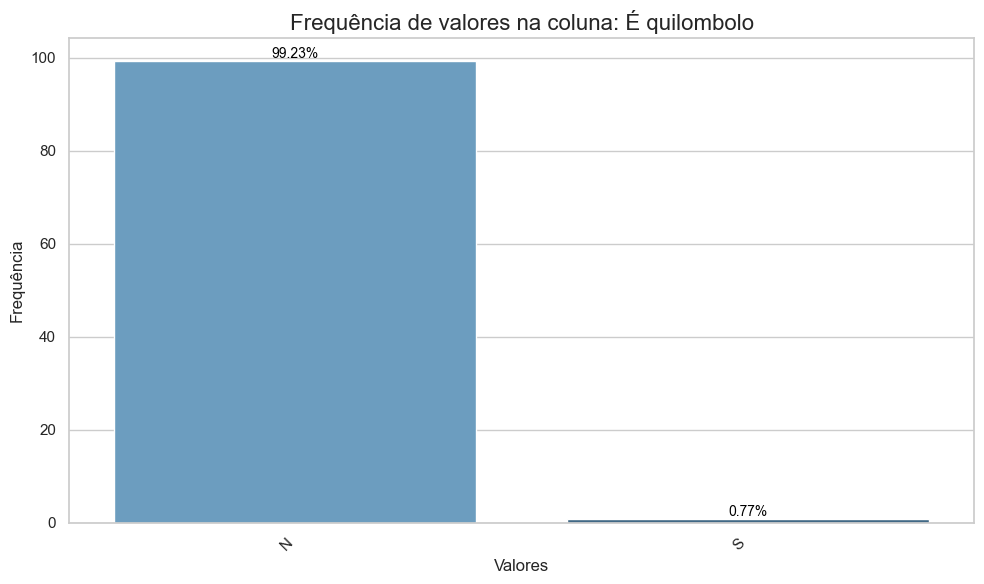

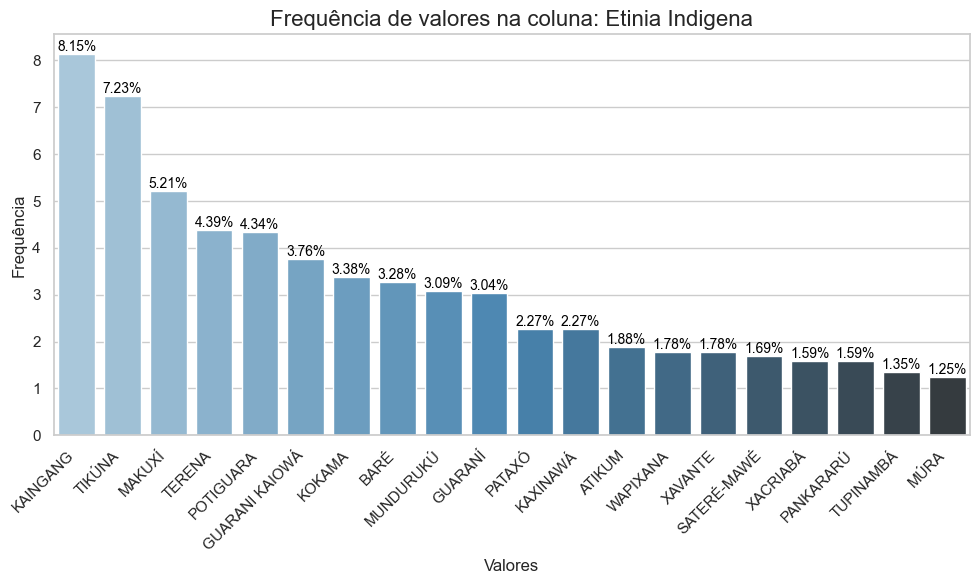

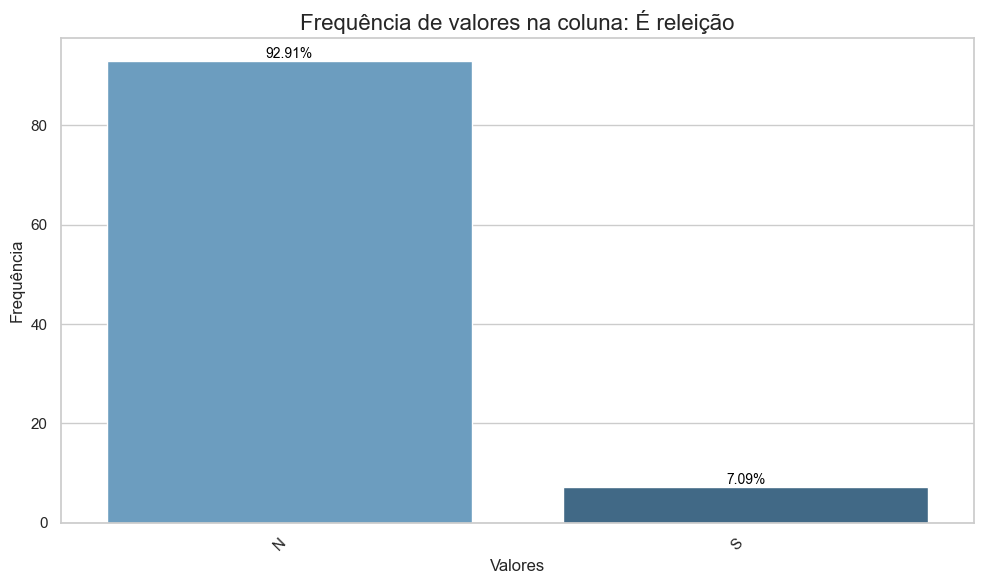

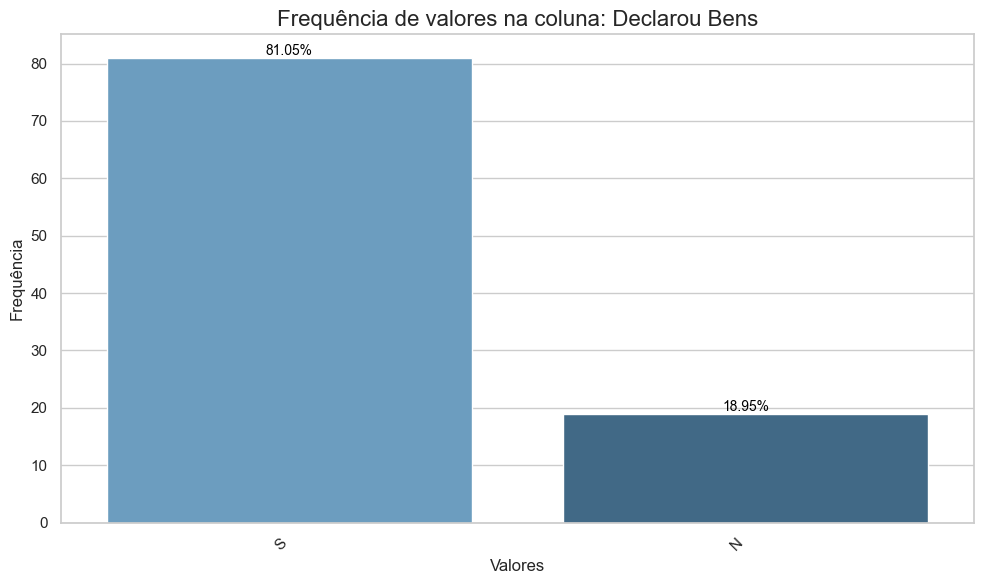

In [56]:
object_columns = df_candidatos.select_dtypes(include='object').columns

verificar_freq_colunas(df_candidatos[object_columns])

### Análises

/var/folders/c_/_zrwpzh91bx6fwnhhrvr_w300000gn/T/ipykernel_33944/4139924290.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df[x_col], rotation=90)


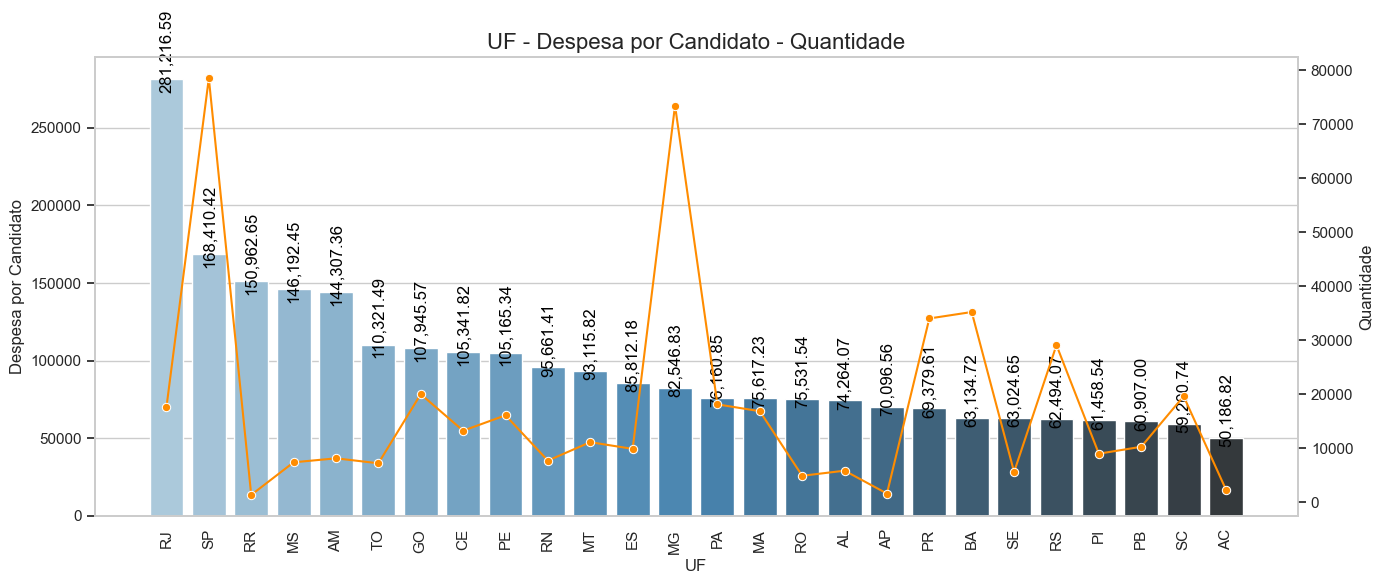

UF  Quantidade  Despesa Max Campanha  Despesa por Candidato
17  RJ       17603      4,950,255,636.94             281,216.59
24  SP       78504     13,220,891,951.97             168,410.42
20  RR        1345        203,044,769.40             150,962.65
10  MS        7380      1,078,900,292.09             146,192.45
2   AM        8122      1,172,064,347.07             144,307.36
25  TO        7204        794,756,040.59             110,321.49
7   GO       20001      2,159,019,329.25             107,945.57
5   CE       13237      1,394,409,711.56             105,341.82
14  PE       16085      1,691,584,471.79             105,165.34
18  RN        7698        736,401,528.59              95,661.41
11  MT       11112      1,034,703,028.15              93,115.82
6   ES        9869        846,880,365.43              85,812.18
9   MG       73451      6,063,147,478.42              82,546.83
12  PA       18111      1,379,349,159.00              76,160.85
8   MA       16846      1,273,847,834.13              75,617.23
19  RO        4886        369,047,118.55              75,531.54
1   AL        5834        433,256,559.97              74,264.07
3   AP        1596        111,874,105.20              70,096.56
16  PR       34020      2,360,294,453.31              69,379.61
4   BA       35213      2,223,162,991.12              63,134.72
23  SE        5594        352,559,869.27              63,024.65
21  RS       29080      1,817,327,536.82              62,494.07
15  PI        8978        551,774,754.14              61,458.54
13  PB       10258        624,784,034.23              60,907.00
22  SC       19619      1,161,459,296.98              59,200.74
0   AC        2311        115,981,732.14              50,186.82

In [57]:
df = df_candidatos.groupby('UF').agg({'Quantidade': 'sum', 'Despesa Max Campanha': 'sum'}).reset_index()

df['Despesa por Candidato']= df['Despesa Max Campanha']/ df['Quantidade']
df.sort_values('Despesa por Candidato',ascending=False, inplace=True)

grafico_barra_linha(df.sort_values('Despesa por Candidato', ascending=False),'UF','Despesa por Candidato', 'Quantidade')
df

/var/folders/c_/_zrwpzh91bx6fwnhhrvr_w300000gn/T/ipykernel_33944/4139924290.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df[x_col], rotation=90)


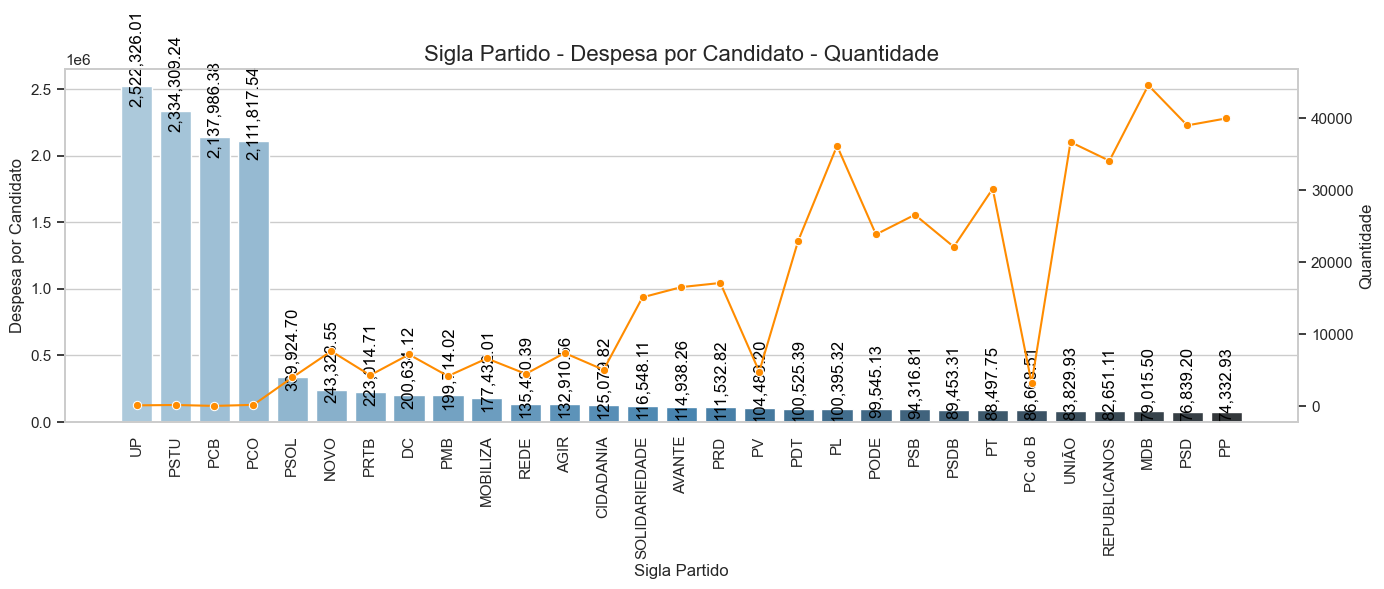

In [58]:
df = df_candidatos.groupby('Sigla Partido').agg({'Quantidade': 'sum', 'Despesa Max Campanha': 'sum'}).reset_index()

total = df['Despesa Max Campanha'].sum()

df['Despesa por Candidato']= df['Despesa Max Campanha']/ df['Quantidade']

df['Despesas Percentuais']= (df['Despesa Max Campanha']/ total) * 100

grafico_barra_linha(df.sort_values('Despesa por Candidato', ascending=False),'Sigla Partido','Despesa por Candidato', 'Quantidade');


df.sort_values('Despesa por Candidato',ascending=False, inplace=True)





/var/folders/c_/_zrwpzh91bx6fwnhhrvr_w300000gn/T/ipykernel_33944/18129443.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


UF  Despesas por Candidato_FEMININO  Despesas por Candidato_MASCULINO  \
17  RJ                       261,586.95                        291,244.54   
24  SP                       153,298.77                        176,254.87   
20  RR                       143,998.94                        154,852.01   
10  MS                       145,888.93                        146,361.30   
2   AM                       120,520.03                        156,842.77   
25  TO                       112,886.62                        108,943.13   
7   GO                        97,166.59                        113,698.33   
14  PE                       101,063.52                        107,305.50   
5   CE                        83,068.99                        117,547.47   
18  RN                        90,170.87                         98,580.38   
11  MT                        77,989.37                        101,321.57   
6   ES                        69,570.63                         94,068.24   
9   MG                        75,220.72                         86,253.45   
19  RO                        73,636.15                         76,526.56   
12  PA                        69,102.13                         79,979.39   
8   MA                        68,834.79                         79,362.47   
1   AL                        68,579.98                         77,115.62   
3   AP                        66,040.03                         72,307.42   
16  PR                        64,991.07                         71,643.70   
23  SE                        68,620.45                         60,023.11   
4   BA                        54,898.49                         67,384.93   
21  RS                        56,030.26                         65,928.50   
15  PI                        54,239.38                         65,103.21   
13  PB                        50,922.04                         65,997.95   
22  SC                        51,639.89                         63,180.88   
0   AC                        46,934.19                         51,945.40   

    Quantidade_FEMININO  Quantidade_MASCULINO  Despesas por Candidato  \
17                 5952                 11651              552,831.49   
24                26826                 51678              329,553.64   
20                  482                   863              298,850.94   
10                 2638                  4742              292,250.23   
2                  2803                  5319              277,362.80   
25                 2518                  4686              221,829.76   
7                  6960                 13041              210,864.91   
14                 5515                 10570              208,369.02   
5                  4686                  8551              200,616.46   
18                 2672                  5026              188,751.24   
11                 3908                  7204              179,310.94   
6                  3326                  6543              163,638.86   
9                 24677                 48774              161,474.17   
19                 1682                  3204              150,162.72   
12                 6358                 11753              149,081.52   
8                  5993                 10853              148,197.26   
1                  1949                  3885              145,695.60   
3                   563                  1033              138,347.45   
16                11578                 22442              136,634.77   
23                 1953                  3641              128,643.55   
4                 11986                 23227              122,283.42   
21                10090                 18990              121,958.76   
15                 3012                  5966              119,342.59   
13                 3464                  6794              116,919.99   
22                 6766                 12853              114,820.77   
0                   811   

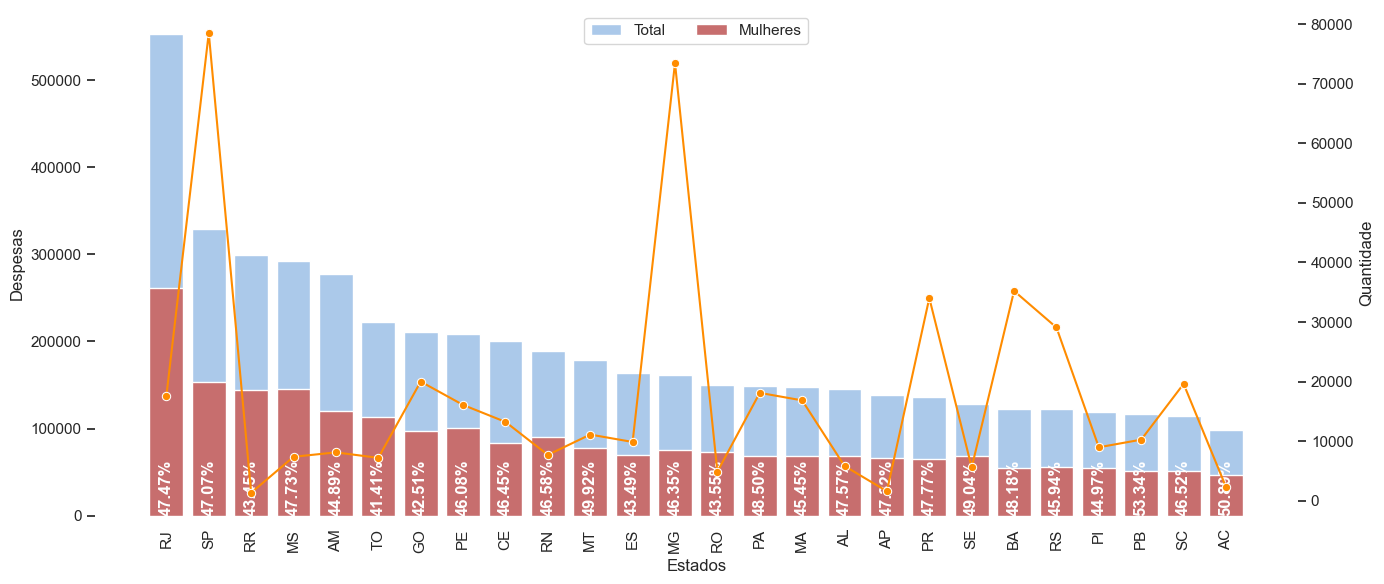

In [59]:
df = df_candidatos.groupby(['UF','Genero']).agg({'Quantidade': 'sum', 'Despesa Max Campanha': 'sum'}).reset_index()

df['Despesas por Candidato'] = df['Despesa Max Campanha'] / df['Quantidade']

# Criando uma tabela pivô, transformando 'Genero' em colunas
df_pivot = df.pivot_table(index='UF', columns='Genero', values=['Quantidade', 'Despesas por Candidato'], aggfunc='sum')

# Removendo a multi-index nas colunas
df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]

# Resetando o índice para deixar 'UF' como coluna normal
df_pivot.reset_index(inplace=True)

df_pivot['Despesas por Candidato'] = df_pivot['Despesas por Candidato_FEMININO'] + df_pivot['Despesas por Candidato_MASCULINO']

df_pivot['Quantidade'] = df_pivot['Quantidade_FEMININO'] + df_pivot['Quantidade_MASCULINO']


criar_grafico_barras_linha(df_pivot, 'Despesas por Candidato_FEMININO', 'Despesas por Candidato', 'Quantidade', 'UF', titulo=' ')

df_pivot

/var/folders/c_/_zrwpzh91bx6fwnhhrvr_w300000gn/T/ipykernel_33944/18129443.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


Sigla Partido  Despesas por Candidato_FEMININO  \
28             UP                     2,569,860.25   
21           PSTU                     1,209,770.20   
9             PCO                     1,838,032.14   
8             PCB                       997,715.36   
20           PSOL                       273,948.10   
6            NOVO                       234,947.79   
16           PRTB                       193,709.04   
12            PMB                       209,049.13   
3              DC                       179,485.20   
5        MOBILIZA                       159,852.90   
24           REDE                       134,395.97   
0            AGIR                       124,168.38   
2       CIDADANIA                       112,264.73   
26  SOLIDARIEDADE                       106,354.46   
1          AVANTE                       104,740.69   
15            PRD                       106,497.42   
23             PV                        94,454.54   
10            PDT                        93,629.74   
13           PODE                        89,406.52   
11             PL                        83,841.98   
17            PSB                        91,522.29   
7         PC do B                        87,577.57   
19           PSDB                        78,264.55   
22             PT                        80,505.06   
27          UNIÃO                        75,400.39   
25   REPUBLICANOS                        75,243.74   
4             MDB                        66,141.40   
18            PSD                        66,711.33   
14             PP                        69,779.41   

    Despesas por Candidato_MASCULINO  Quantidade_FEMININO  \
28                      2,468,392.94                   59   
21                      3,045,752.31                   62   
9                       2,249,860.59                   60   
8                       2,639,705.63                   11   
20                        384,688.57                 1608   
6                         247,687.48                 2612   
16                        238,407.49                 1477   
12                        194,649.44                 1467   
3                         211,607.20                 2450   
5                         186,313.45                 2223   
24                        136,006.29                 1630   
0                         137,491.17                 2536   
2                         132,519.80                 1852   
26                        121,889.64                 5195   
1                         120,163.48                 5600   
15                        114,125.46                 5812   
23                        110,927.04                 1874   
10                        104,151.15                 7906   
13                        104,830.88                 8169   
11                        108,707.42                12082   
17                         95,786.21                 9156   
7                          86,043.72                 1299   
19                         95,304.25                 7594   
22                         93,035.06                10929   
27                         88,164.64                12450   
25                         86,446.72                11541   
4                          85,550.79                15000   
18                         81,960.65                13090   
14                         76,637.76                13424   

    Quantidade_MASCULINO  Despesas por Candidato  Quantidade  
28                    52            5,038,253.19         111  
21                    98            4,255,522.51         160  
9                    119            4,087,892.73         179  
8                     25            3,637,420.99          36  
20                  2370              658,636.68        3978  
6                   5022              482,635.28        7634  
16                  2812              432,116.52        4289  
12                  2704              403,698.57

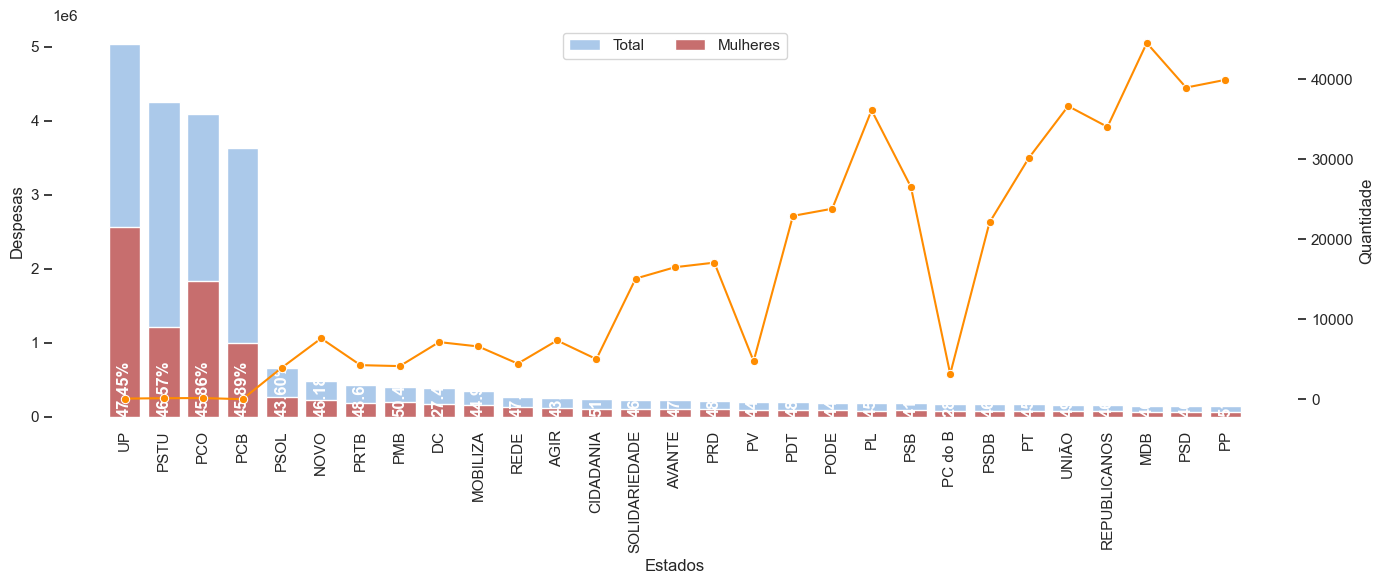

In [60]:
df = df_candidatos.groupby(['Sigla Partido','Genero']).agg({'Quantidade': 'sum', 'Despesa Max Campanha': 'sum'}).reset_index()

df['Despesas por Candidato'] = df['Despesa Max Campanha'] / df['Quantidade']

# Criando uma tabela pivô, transformando 'Genero' em colunas
df_pivot = df.pivot_table(index='Sigla Partido', columns='Genero', values=['Quantidade', 'Despesas por Candidato'], aggfunc='sum')

# Removendo a multi-index nas colunas
df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]

# Resetando o índice para deixar 'UF' como coluna normal
df_pivot.reset_index(inplace=True)

df_pivot['Despesas por Candidato'] = df_pivot['Despesas por Candidato_FEMININO'] + df_pivot['Despesas por Candidato_MASCULINO']

df_pivot['Quantidade'] = df_pivot['Quantidade_FEMININO'] + df_pivot['Quantidade_MASCULINO']


criar_grafico_barras_linha(df_pivot, 'Despesas por Candidato_FEMININO', 'Despesas por Candidato', 'Quantidade', 'Sigla Partido', titulo=' ')

df_pivot